In [60]:
# %pip install pandas==1.3.5 numpy==1.21.6 seaborn==0.11.2 matplotlib==3.5.2 scikit-learn==1.0.2 tensorflow==2.8.0 scikit-elm==0.4.5

In [61]:
# %pip install pandas numpy seaborn matplotlib scikit-learn

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
df=pd.read_csv('./data.csv',encoding='unicode_escape')

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.shape


(435742, 13)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [68]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [69]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [70]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [71]:
df.columns
# These are all the columns present in the dataset.


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

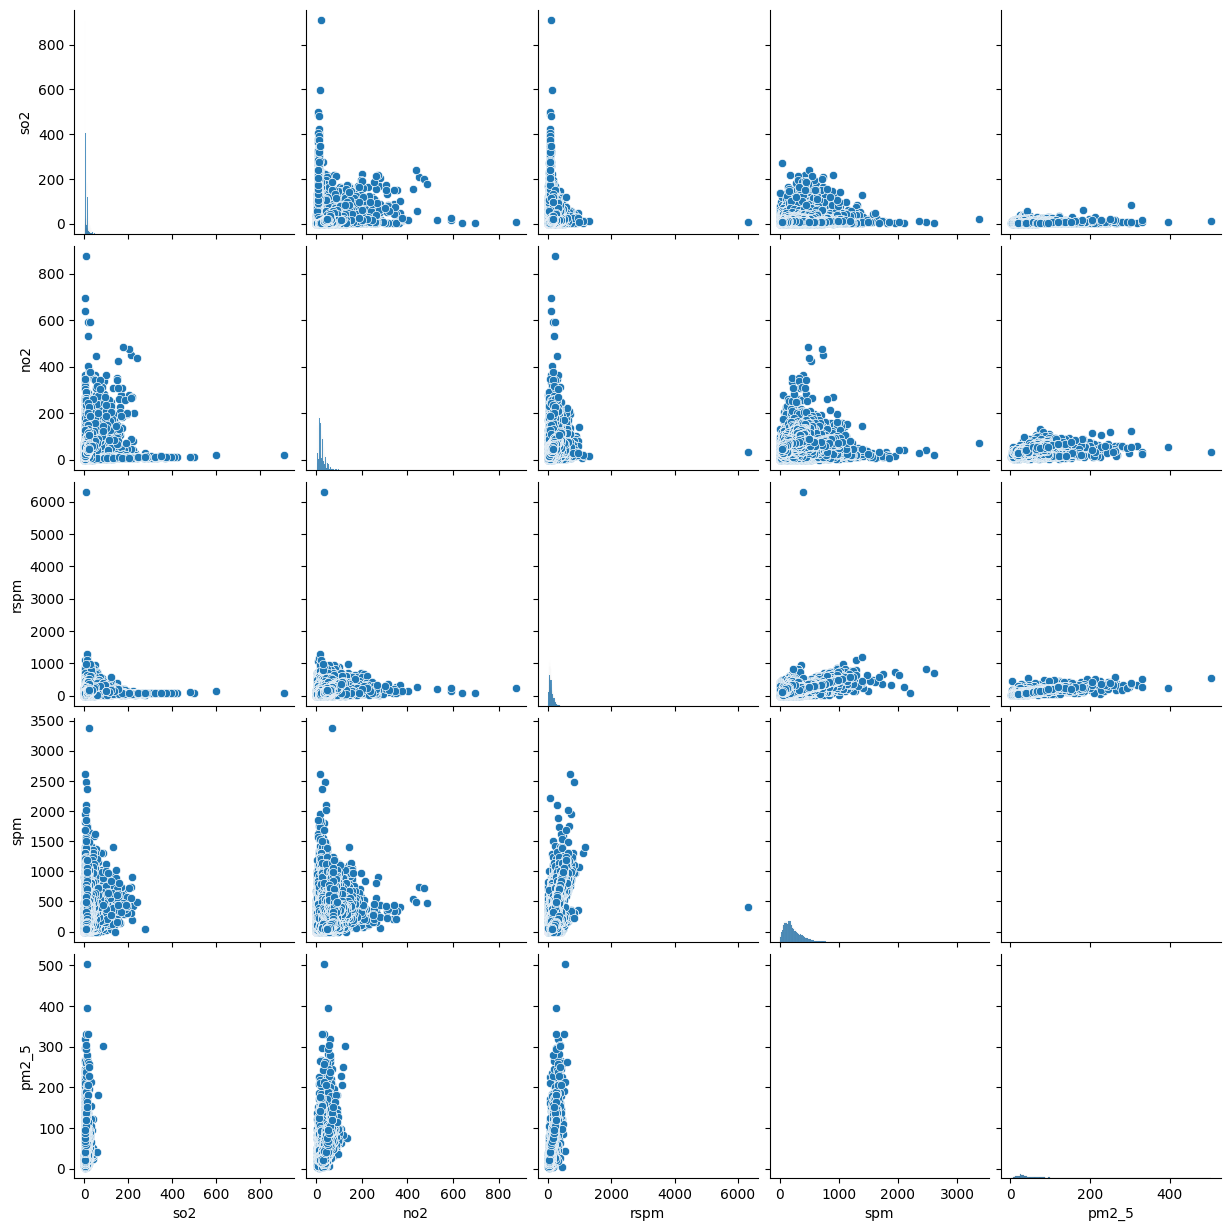

In [72]:
sns.pairplot(data=df)

In [73]:
df['state'].value_counts()
# Viewing the count of values present in the state column


state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

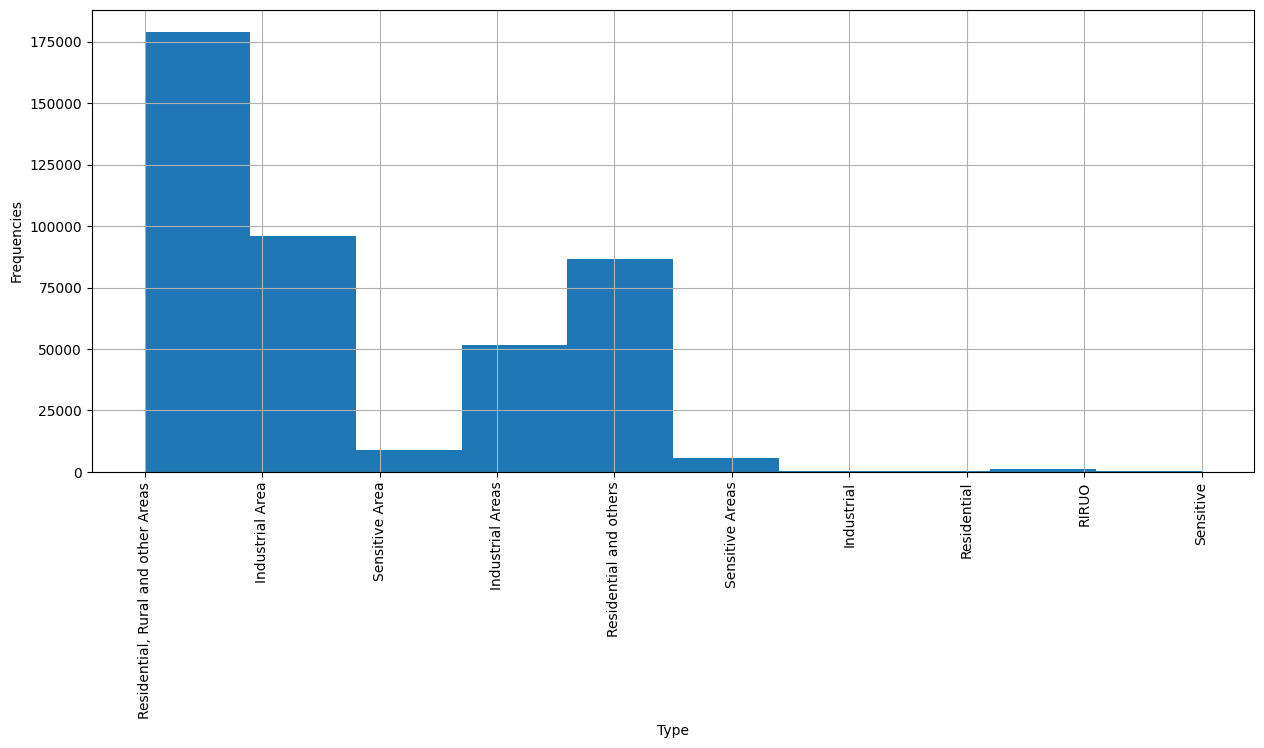

In [74]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset

In [75]:
df['type'].value_counts()
# Viewing the count of values present in the type column


type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

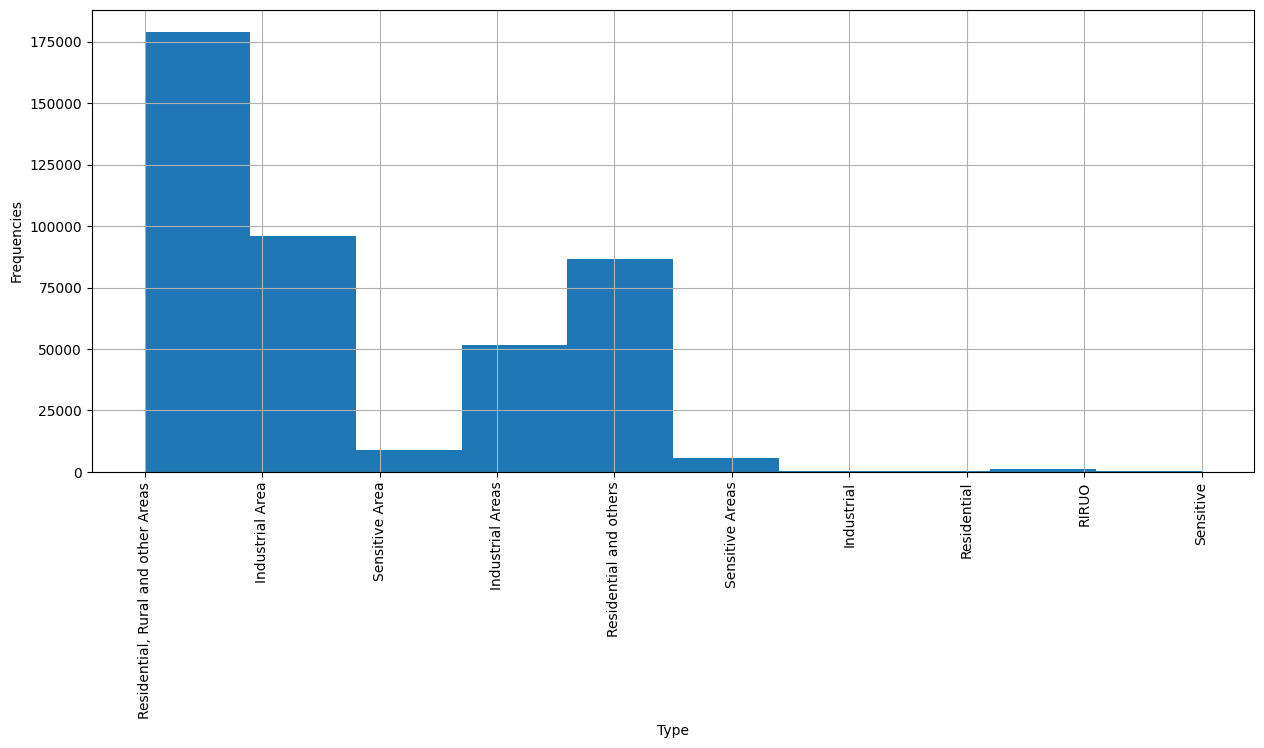

In [76]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset

In [77]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

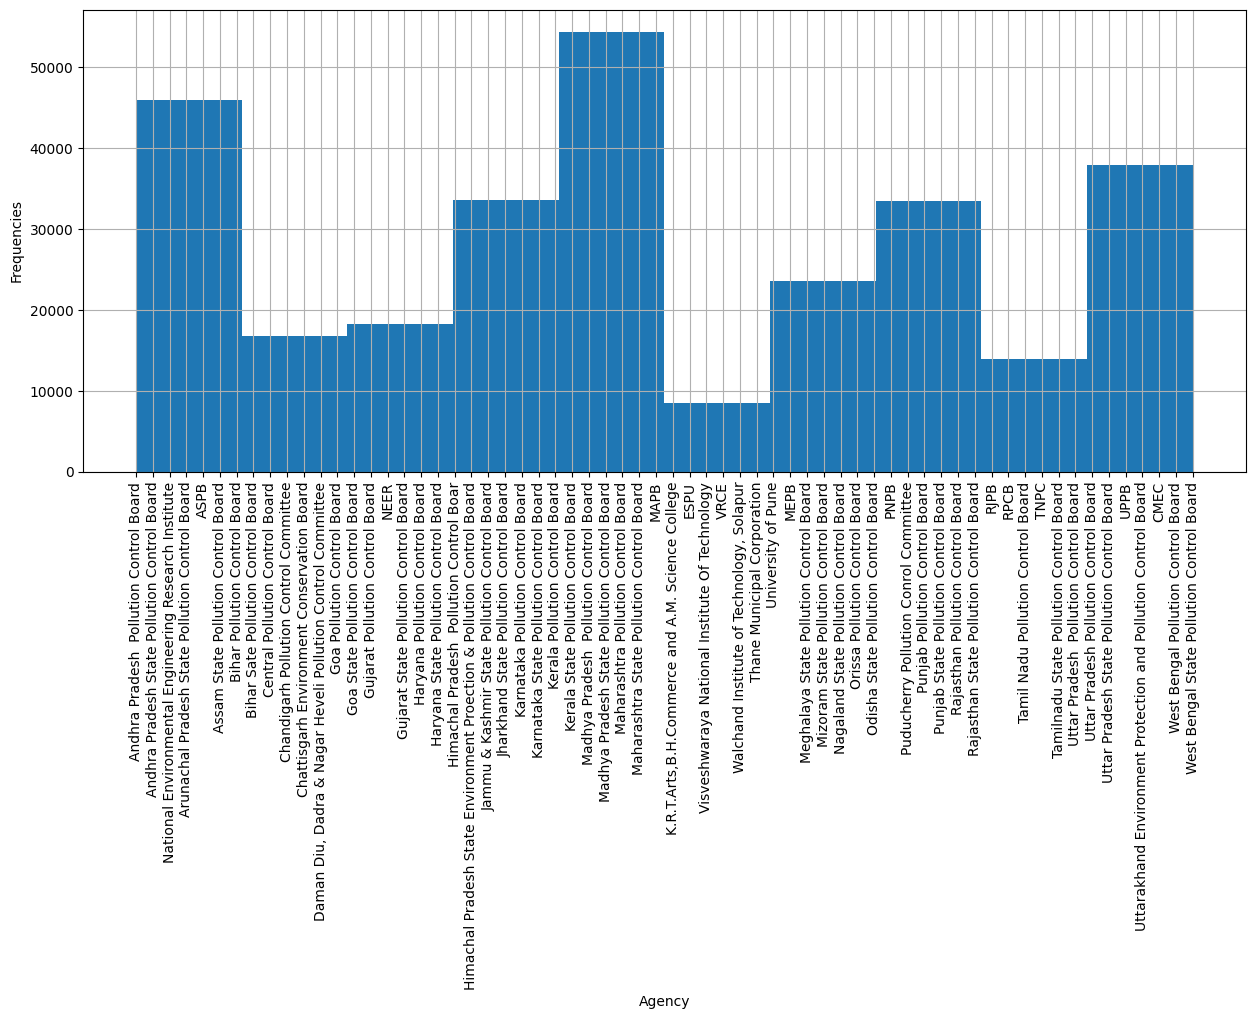

In [78]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset

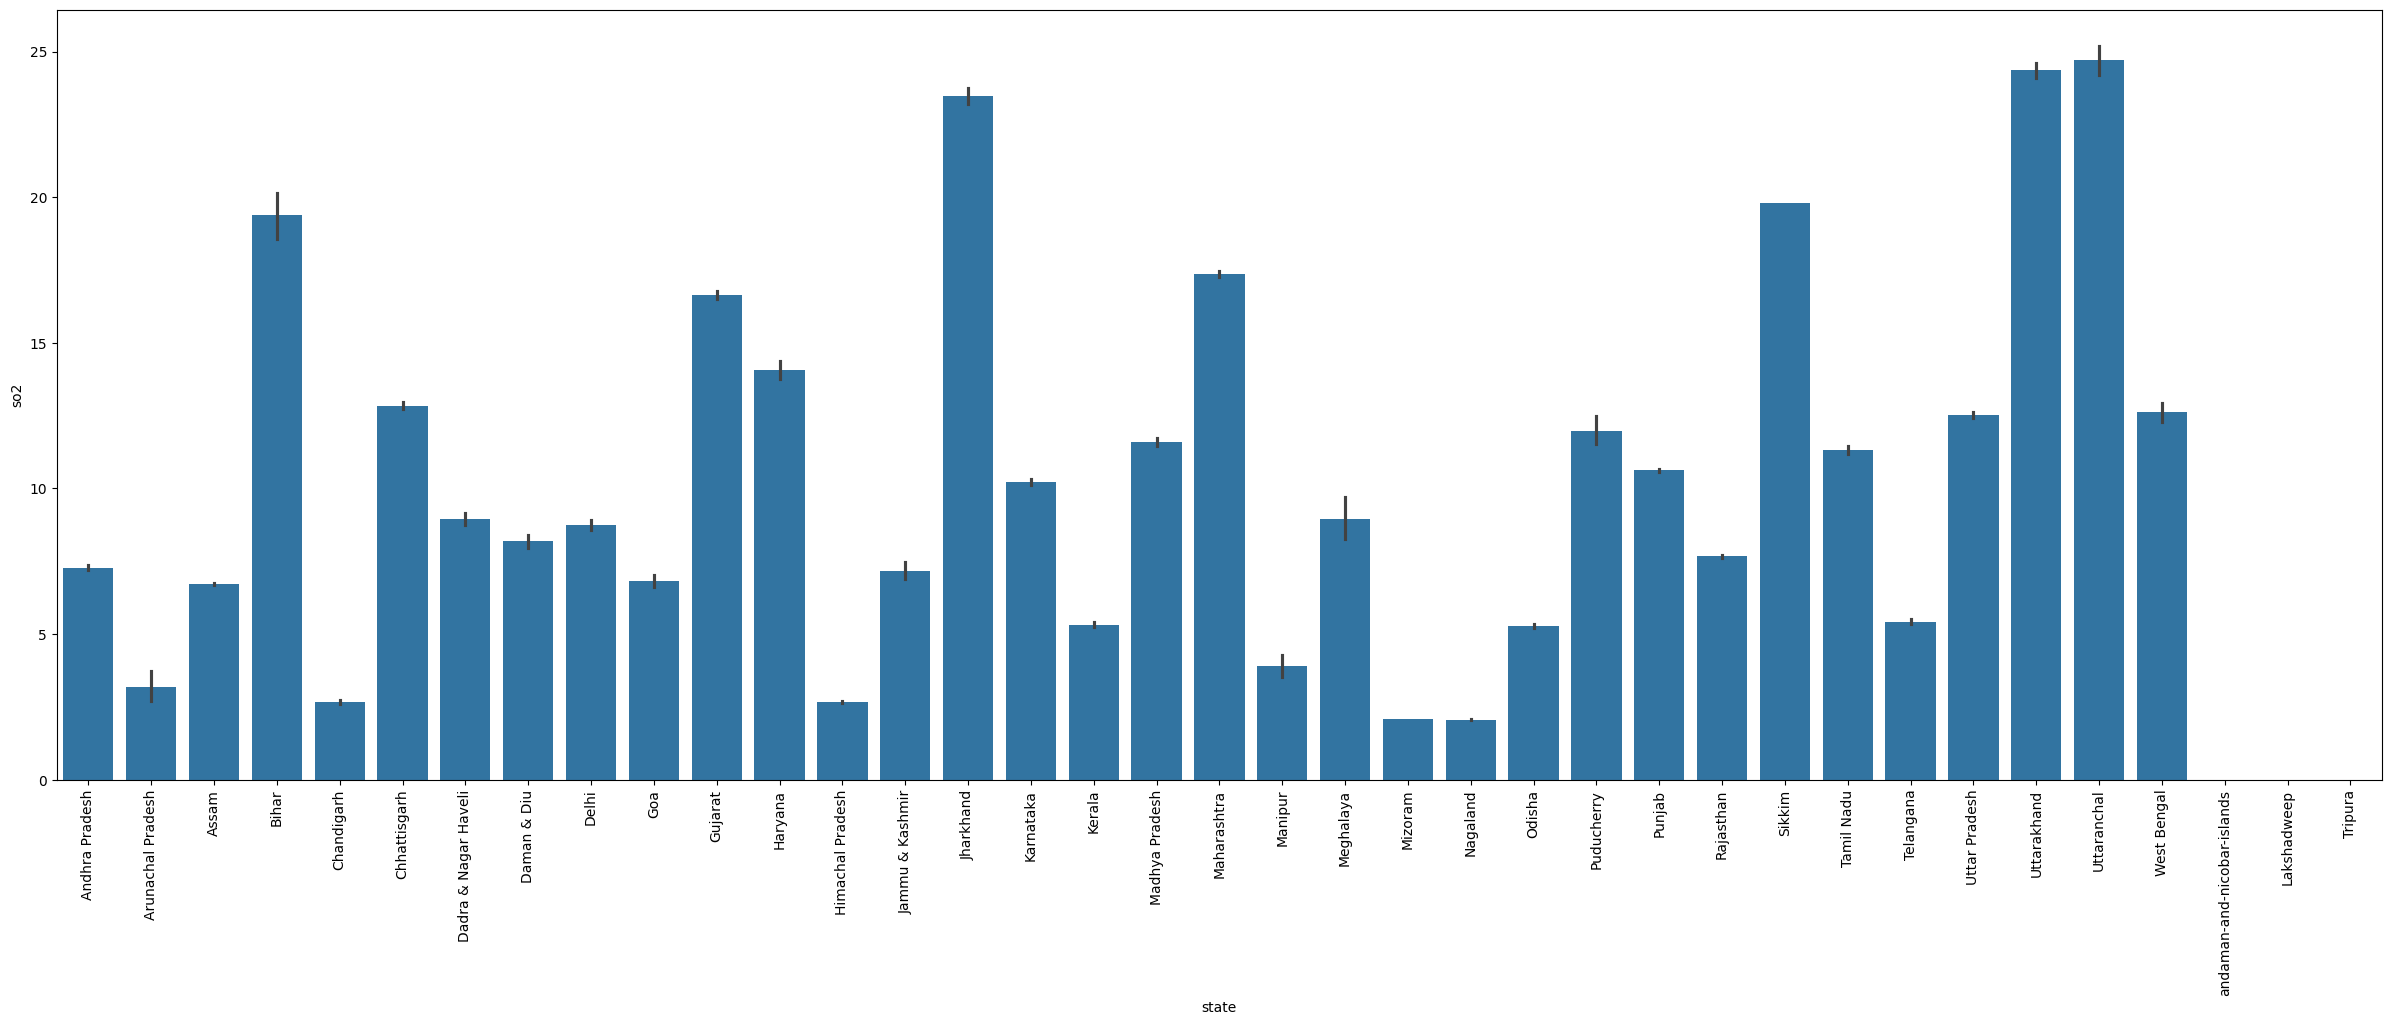

In [79]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air, which is Uttaranchal, followed by Uttarakhand

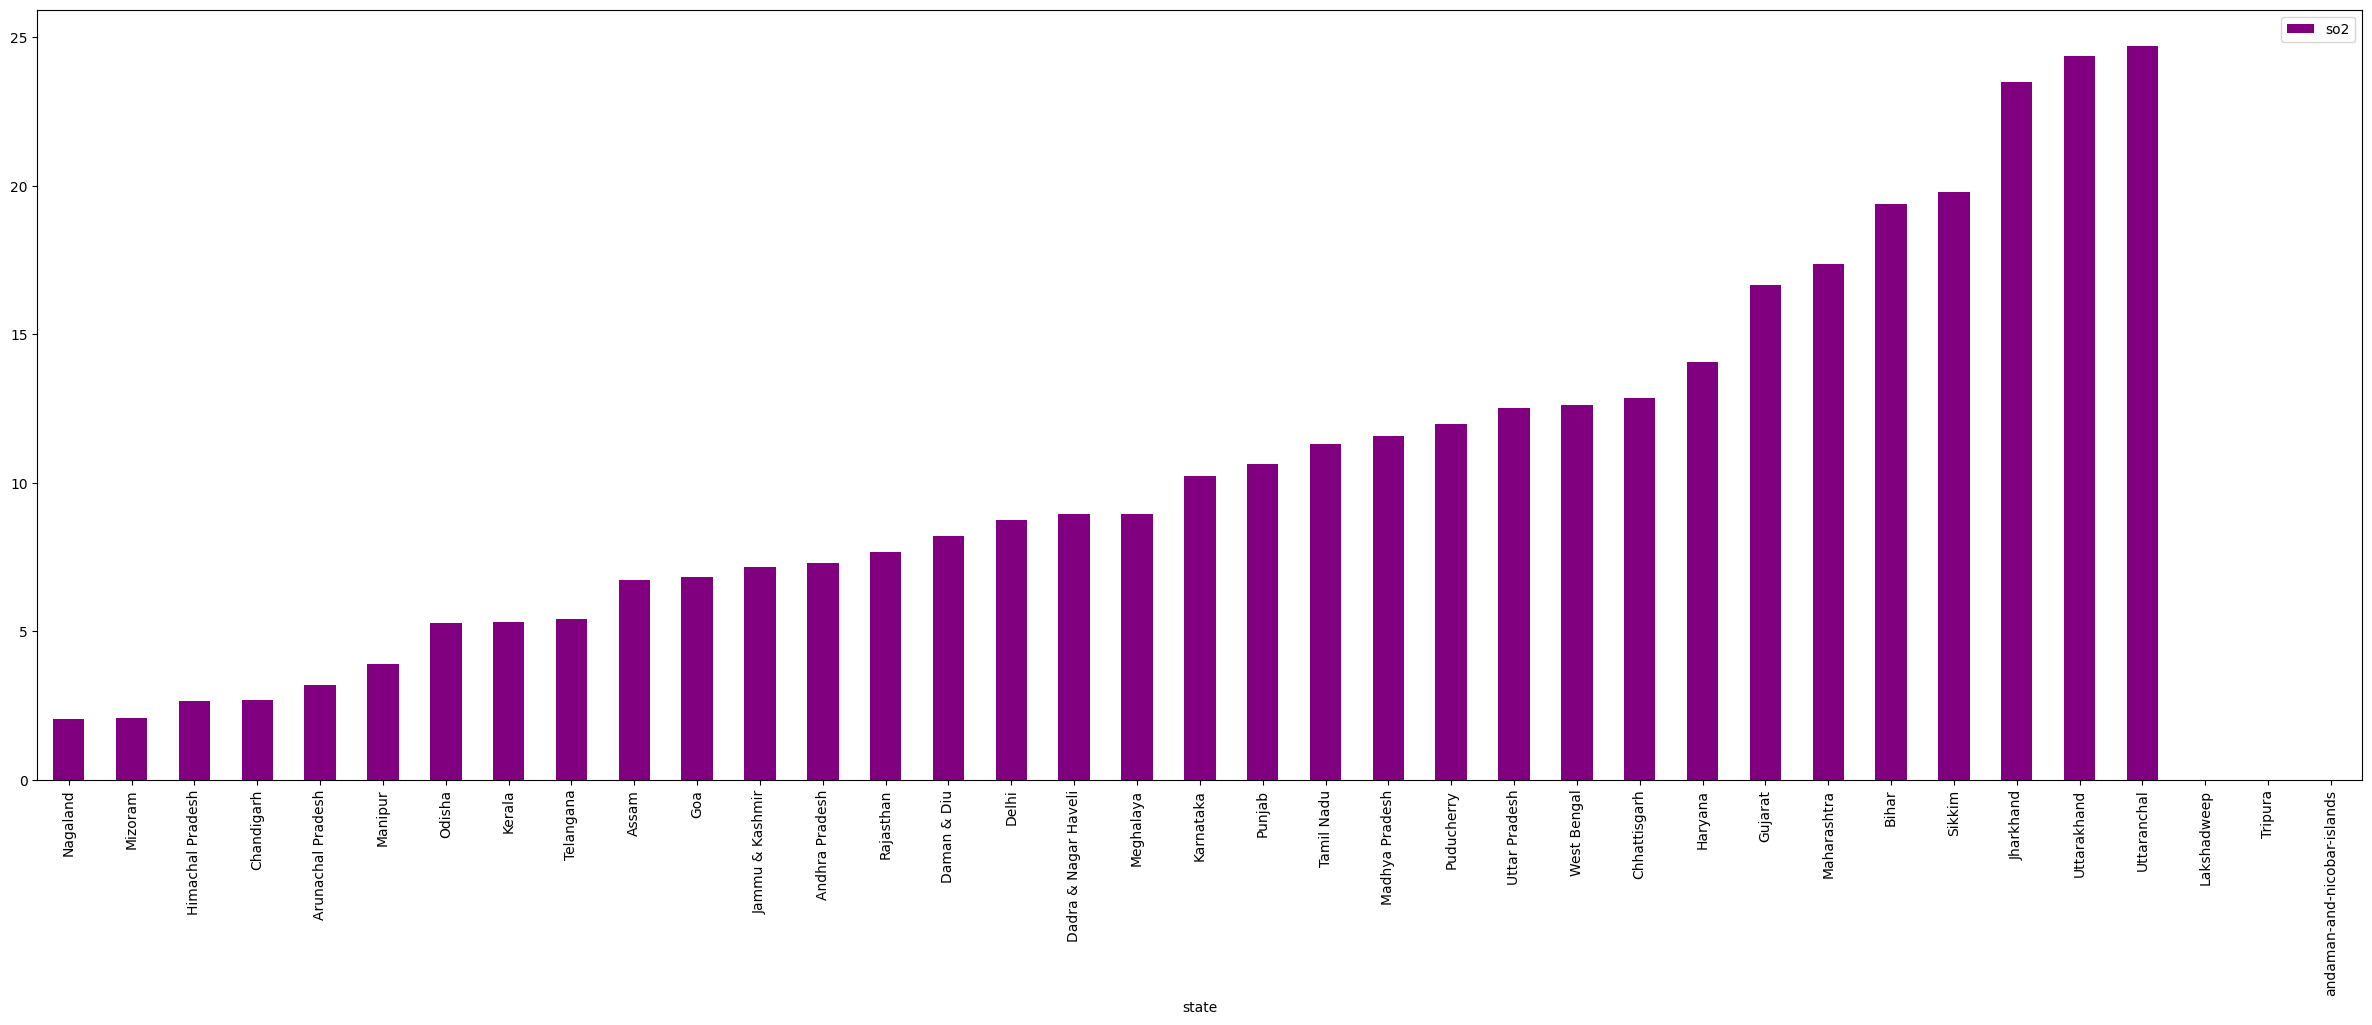

In [80]:
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below, we get a clear picture of the states in increasing order based on their so2 levels.

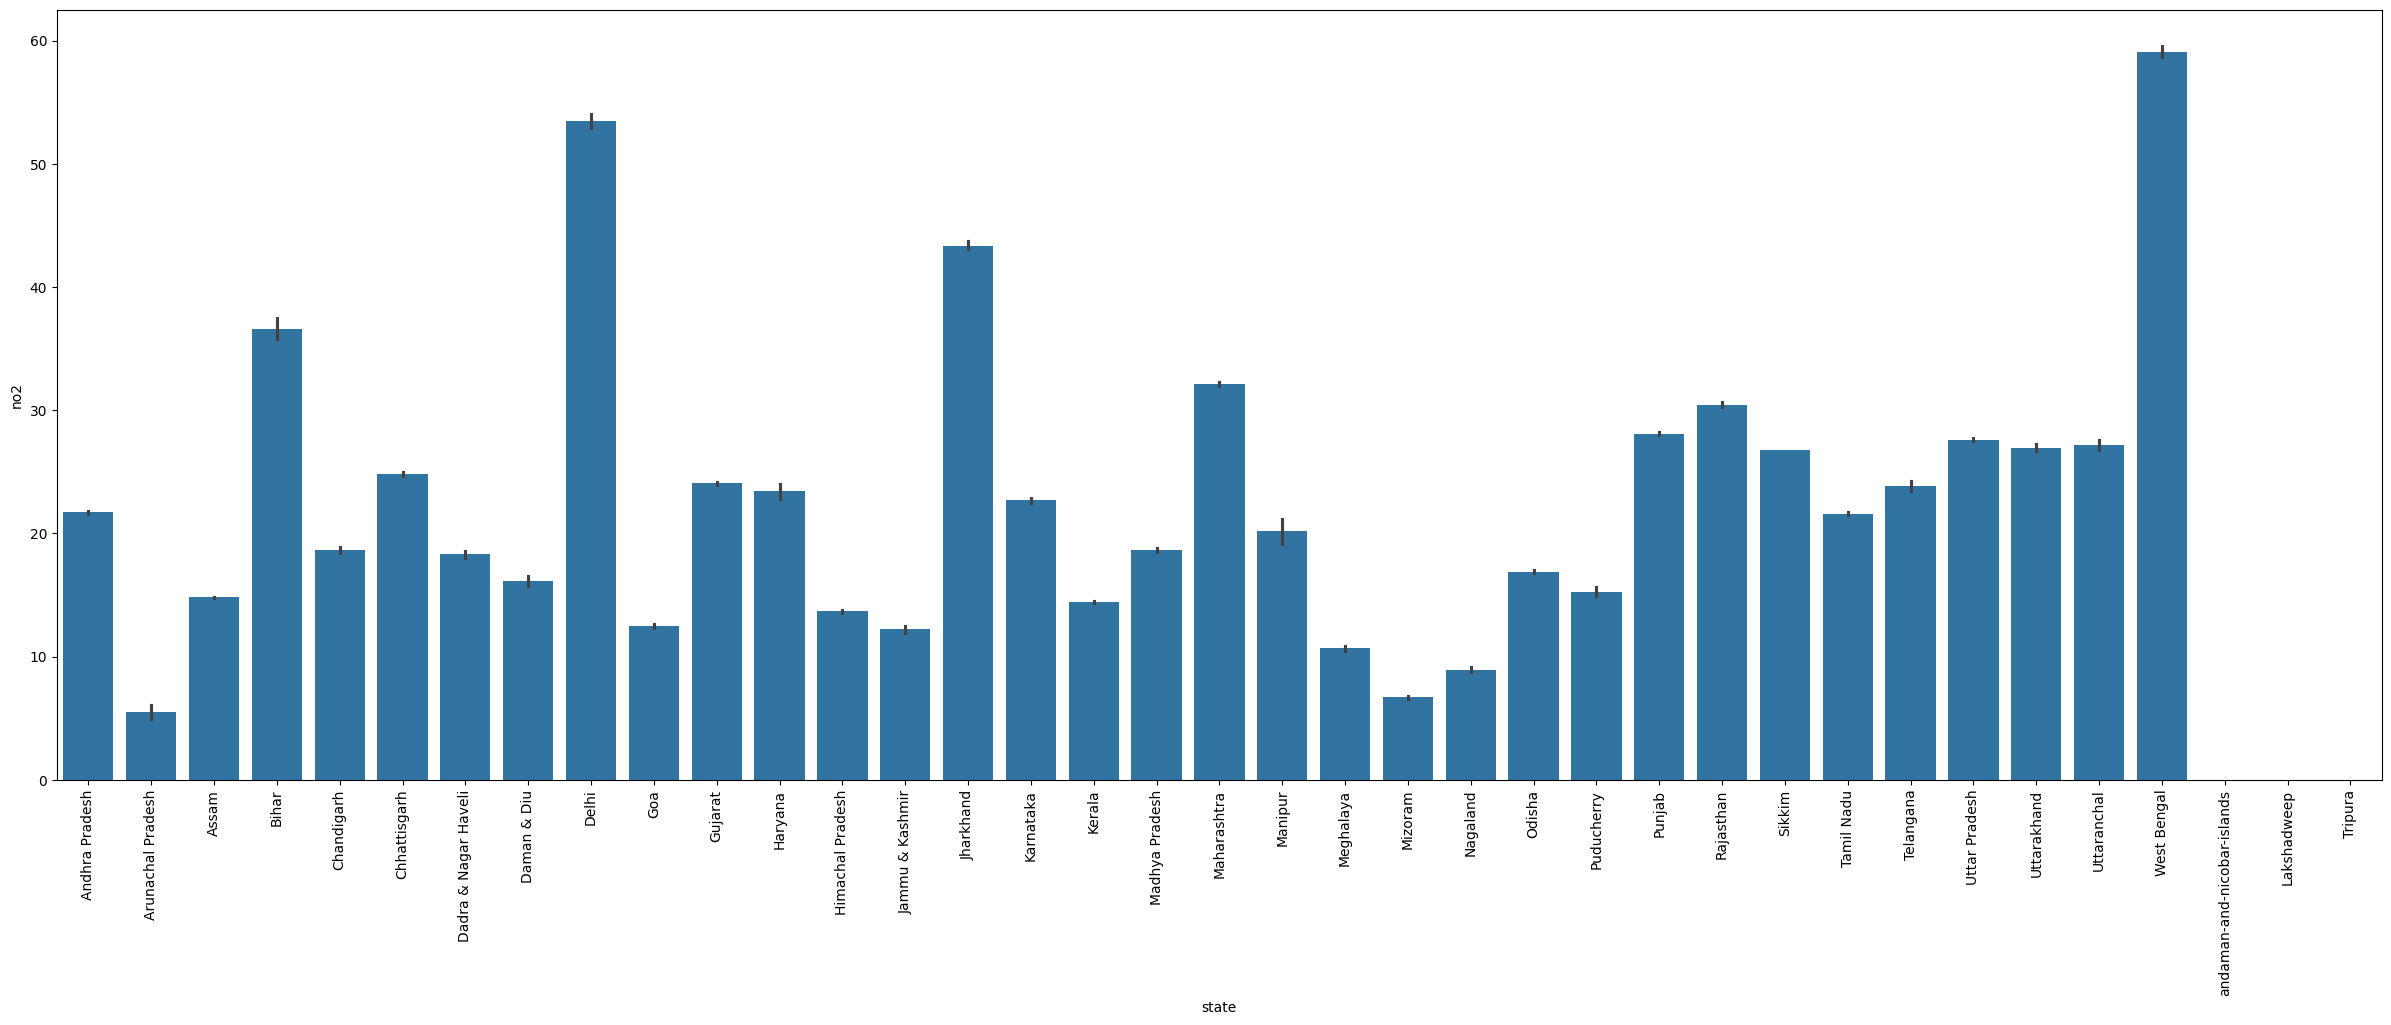

In [81]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West Bengal has a higher no2 level compared to other states


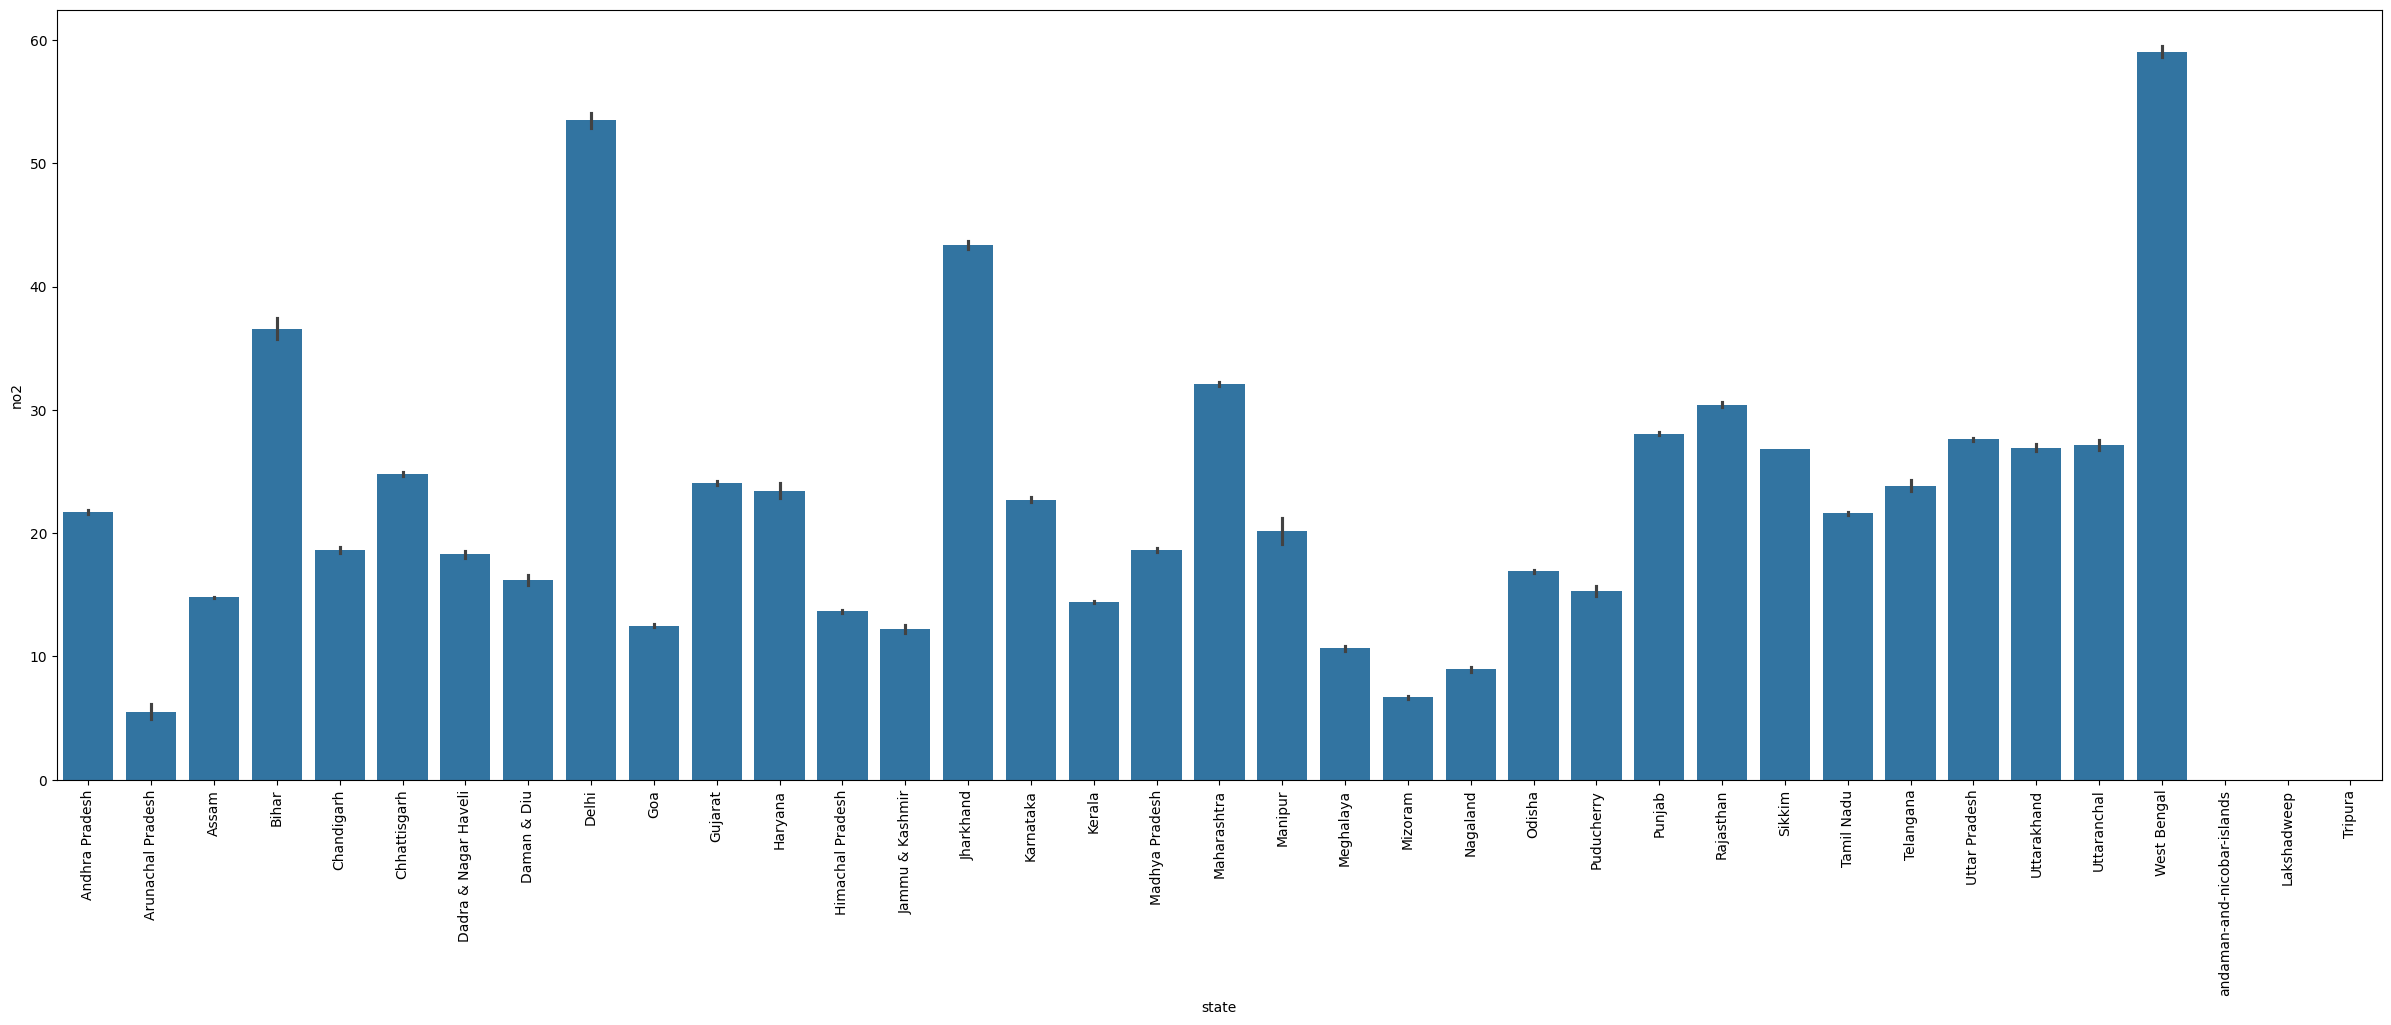

In [82]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West Bengal has a higher no2 level compared to other states

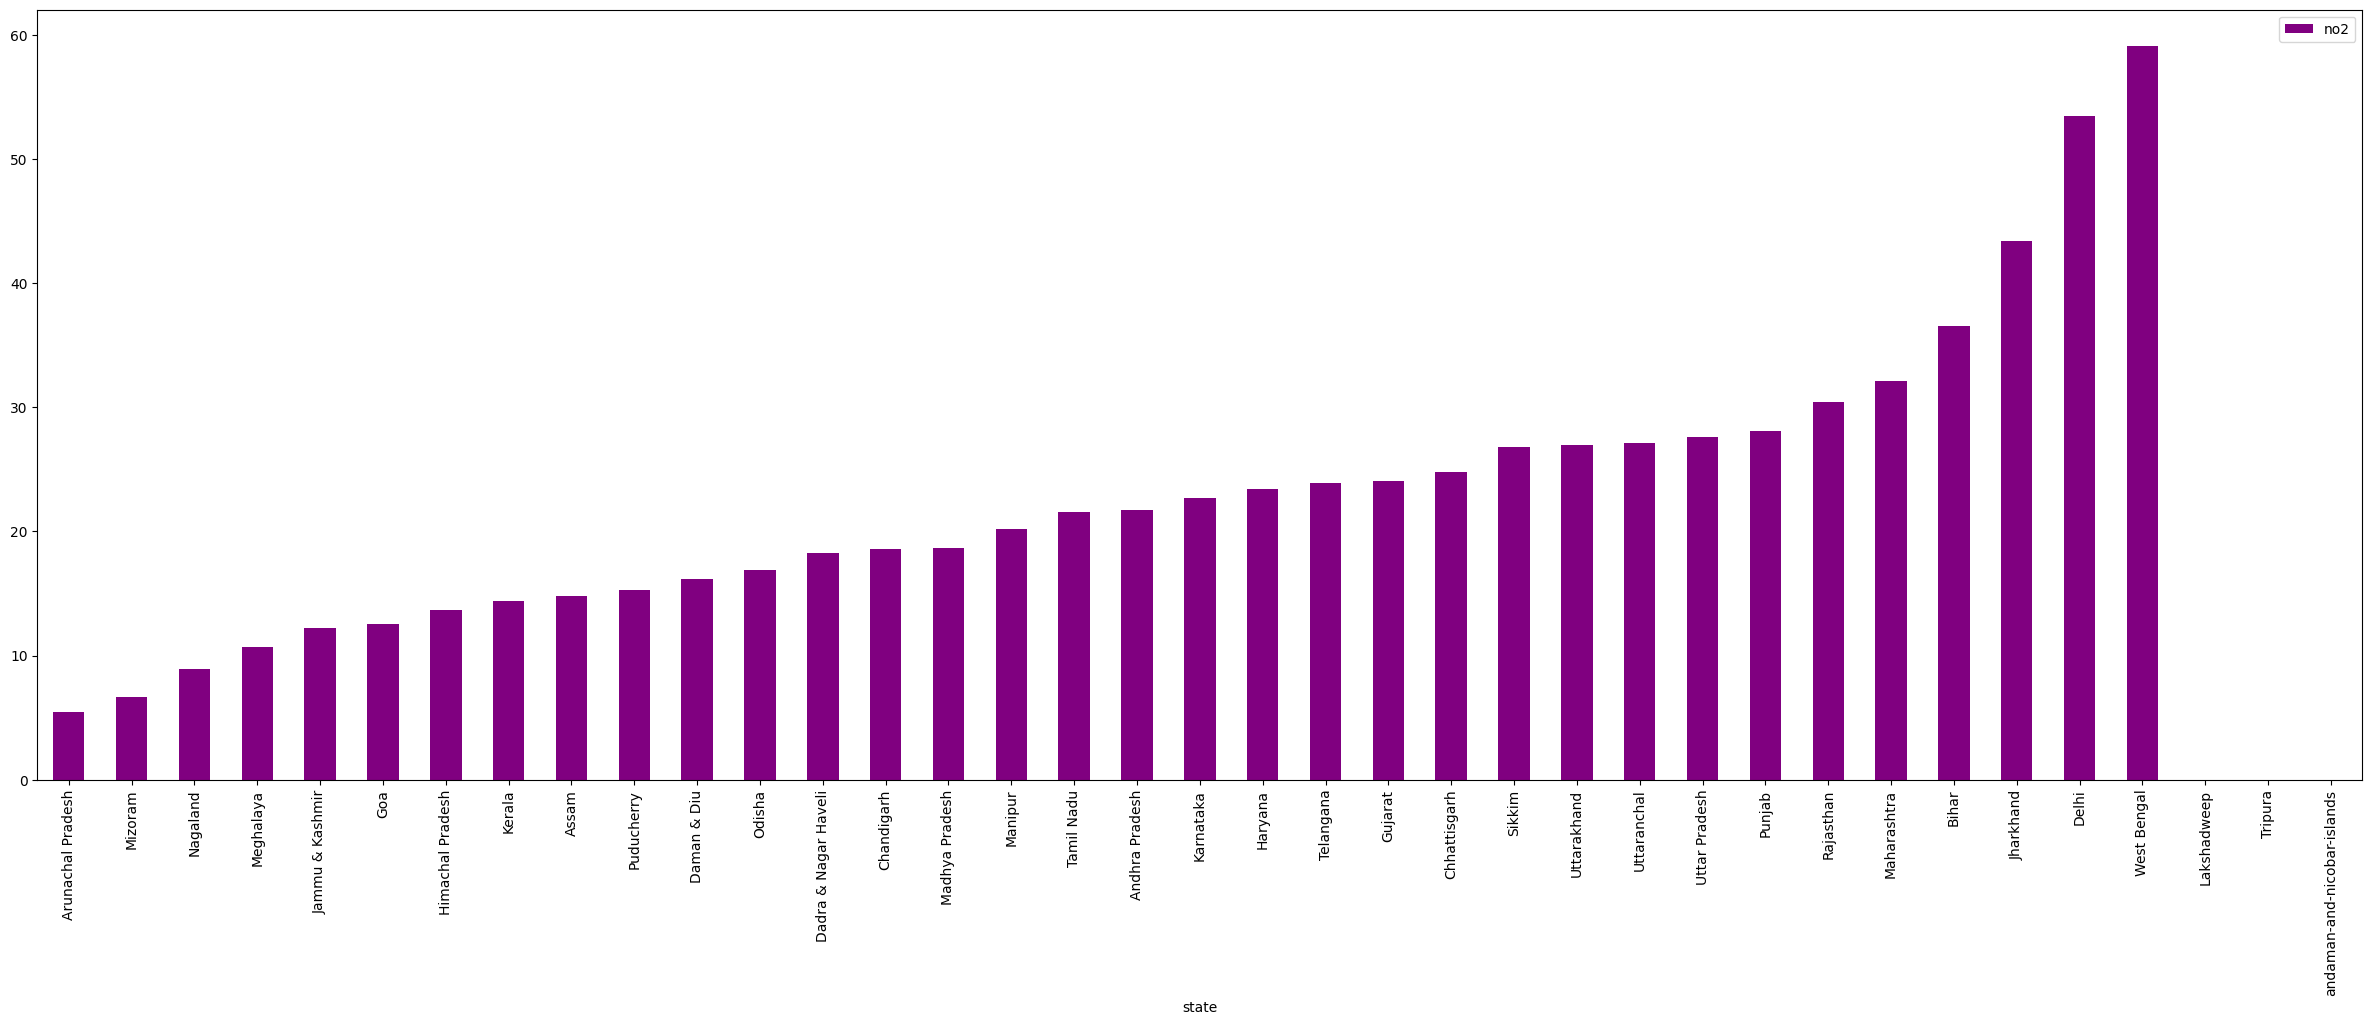

In [83]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below, we get a clear picture of the states in increasing order based on their no2 levels.

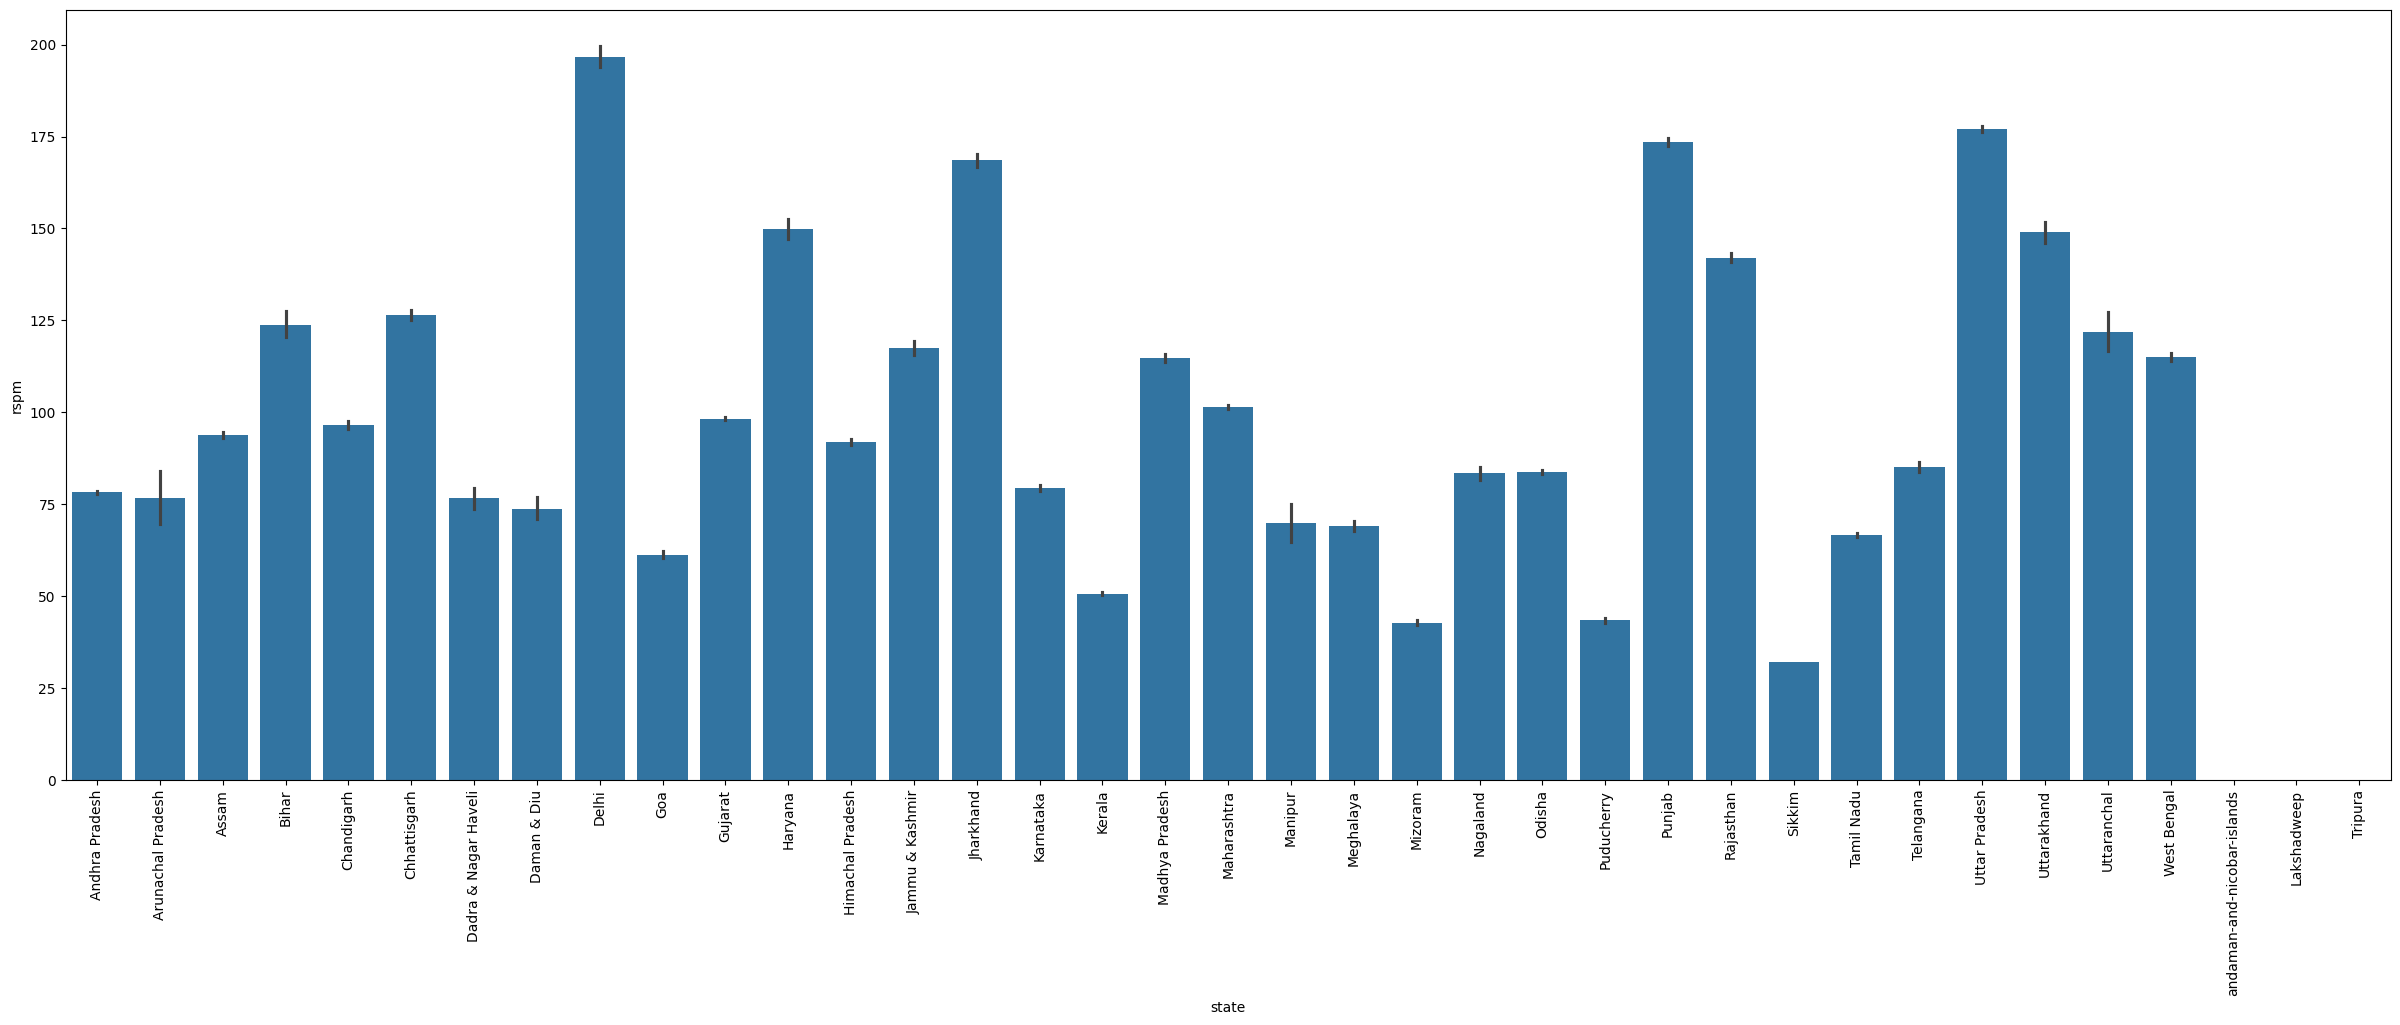

In [84]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has a higher rspm level compared to other states

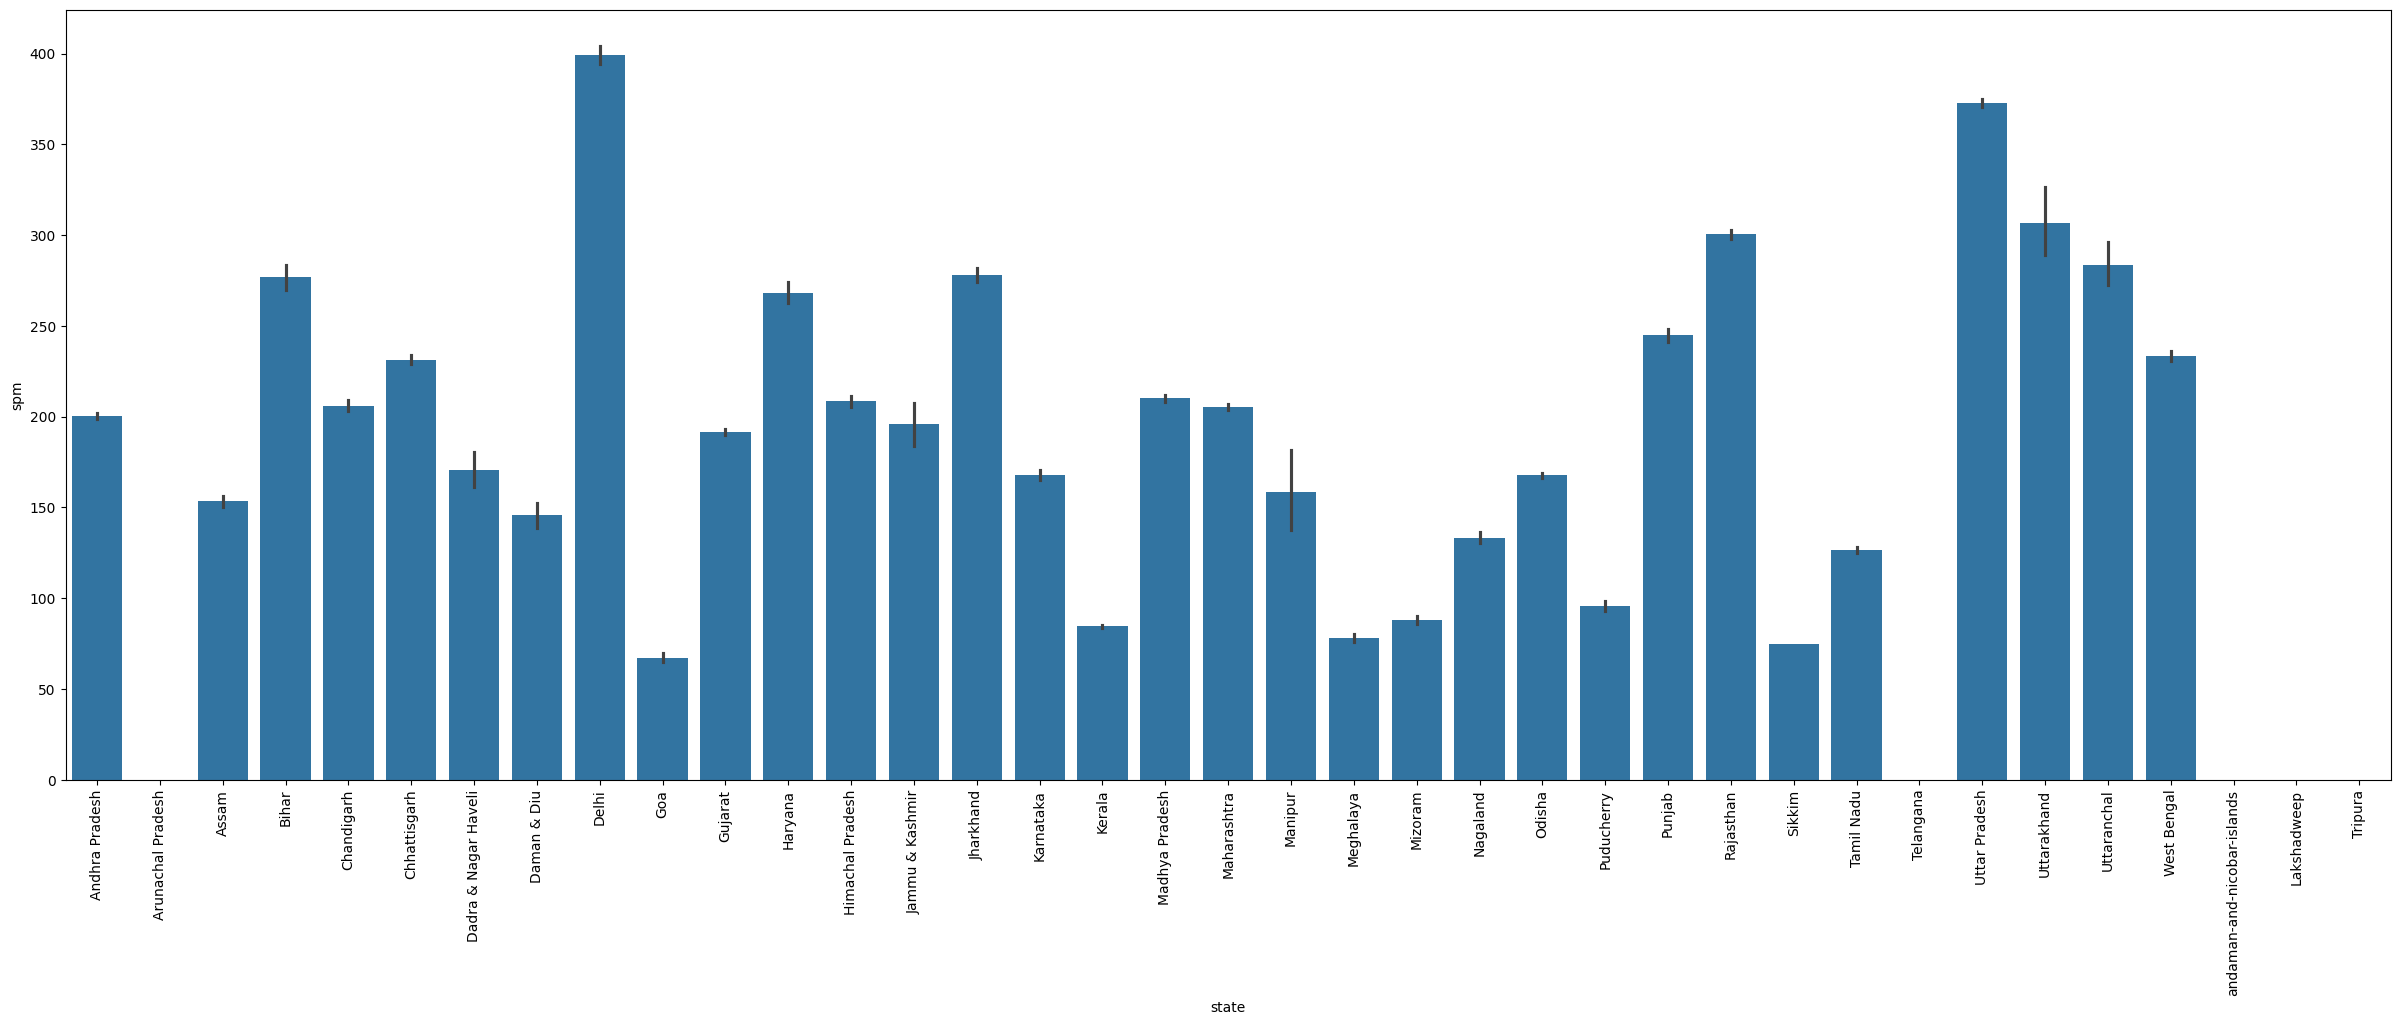

In [85]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has a higher spm level compared to other states

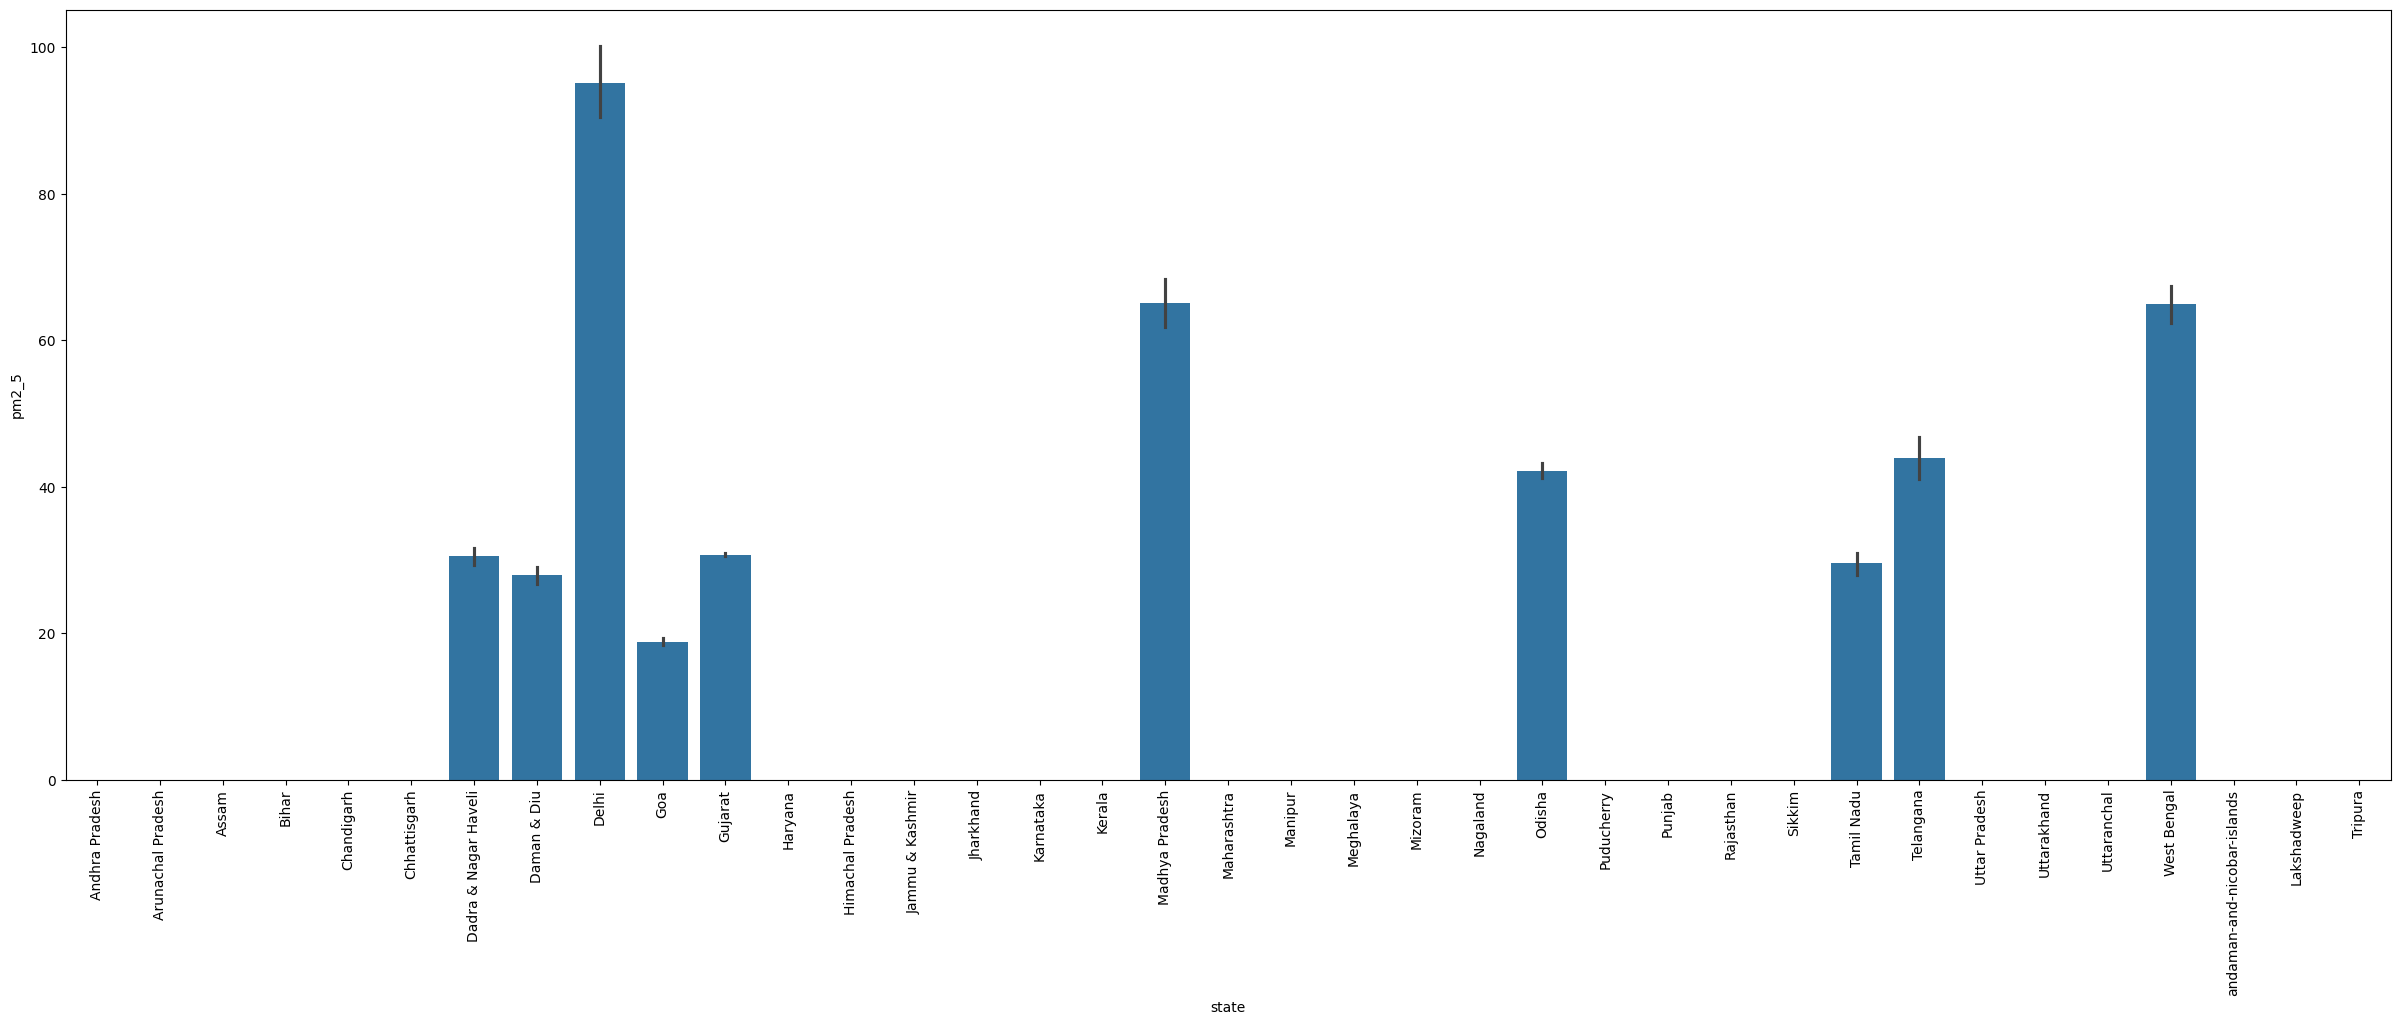

In [86]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has a higher pm2_5 level compared to other states

In [87]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [88]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

missing_data_with_percentage
# As you can see below, these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [89]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [90]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

df.fillna(0, inplace=True)
# Null values are replaced with zeros for the numerical data

df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [91]:
def cal_SOi(so2):
    """  calculating the individual pollutant index for so2(sulphur dioxide)
"""
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [92]:
def cal_RSPMI(rspm):
    """calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)
"""
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [93]:
def cal_SPMi(spm):
    """calculating the individual pollutant index for spm(suspended particulate matter)"""
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [94]:
def cal_aqi(si,rspmi,spmi):
    """Caluclating the Air Quality Index."""
    aqi=0
    if(si>rspmi and si>spmi):
     aqi=si
    if(rspmi>si and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Rpi','SPMi','AQI']]
data.head()


,state,SOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,0.0,0.0,6.000
1,Andhra Pradesh,3.875,0.0,0.0,3.875
2,Andhra Pradesh,7.750,0.0,0.0,7.750
3,Andhra Pradesh,7.875,0.0,0.0,7.875
4,Andhra Pradesh,5.875,0.0,0.0,5.875


In [95]:
def AQI_Range(x):
    """Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous"""
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy."
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,0.0,0.0,6.000,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,0.0,0.0,3.875,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,0.0,0.0,7.750,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,0.0,0.0,7.875,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,0.0,0.0,5.875,Good


In [96]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

AQI_Range
Good               246961
Poor                90350
Moderate            32388
Unhealthy           31562
Hazardous           18692
Very unhealthy.     15789
Name: count, dtype: int64

In [97]:
X2 = df[['SOi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [99]:
#logistic reggration
#fit the model on train data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Import necessary libraries for classification metrics

log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
# Calculate metrics for Logistic Regression
log_reg_accuracy = accuracy_score(Y_test2, test_preds2)  # Accuracy

log_reg_precision = precision_score(Y_test2, test_preds2, average='weighted')  # Precision
log_reg_recall = recall_score(Y_test2, test_preds2, average='weighted')  # Recall
log_reg_f1 = f1_score(Y_test2, test_preds2, average='weighted')  # F1-score
log_reg_kappa = metrics.cohen_kappa_score(Y_test2, test_preds2) #kapa score

print("Model accuracy on test is: ", log_reg_accuracy)
print('-'*50)
# Print the metrics
print("Logistic Regression Metrics:")
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1-score:", log_reg_f1)

# Kappa Score.
print('KappaScore is: ',log_reg_kappa)

Model accuracy on train is:  0.830332217834059
Model accuracy on test is:  0.8314336381654439
--------------------------------------------------
Logistic Regression Metrics:
Accuracy: 0.8314336381654439
Precision: 0.815912482861156
Recall: 0.8314336381654439
F1-score: 0.7998542842926213
KappaScore is:  0.7236590151932885


In [100]:
#decision tree
#fit the model on train data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
DT2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10).fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
dt_accuracy = accuracy_score(Y_test2, test_preds3)  # Accuracy

dt_precision = precision_score(Y_test2, test_preds3, average='weighted')  # Precision
dt_recall = recall_score(Y_test2, test_preds3, average='weighted')  # Recall
dt_f1 = f1_score(Y_test2, test_preds3, average='weighted')  # F1-score
dt_kappa = metrics.cohen_kappa_score(Y_test2, test_preds3) #kapa score

print("Model accuracy on test is: ", dt_accuracy)
print('-'*50)
print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
# Kappa Score
print('KappaScore is: ', dt_kappa)

Model accuracy on train is:  0.9999794483245247
Model accuracy on test is:  0.999951319586912
--------------------------------------------------
Decision Tree Metrics:
Accuracy: 0.999951319586912
Precision: 0.9999513309802348
Recall: 0.999951319586912
F1-score: 0.9999513175619864
KappaScore is:  0.9999216508053275


In [101]:
#random forest
#fit the model on train data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RF=RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='log2').fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(Y_test2, test_preds4)  # Accuracy

rf_precision = precision_score(Y_test2, test_preds4, average='weighted')  # Precision
rf_recall = recall_score(Y_test2, test_preds4, average='weighted')  # Recall
rf_f1 = f1_score(Y_test2, test_preds4, average='weighted')  # F1-score
rf_kappa = metrics.cohen_kappa_score(Y_test2, test_preds4) #kapa score

print("Model accuracy on test is: ", rf_accuracy)
print('-'*50)
# Print the metrics
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Model accuracy on train is:  0.9999417702528198
Model accuracy on test is:  0.9998887304843701
--------------------------------------------------
Random Forest Metrics:
Accuracy: 0.9998887304843701
Precision: 0.9998887652127422
Recall: 0.9998887304843701
F1-score: 0.9998887349951795


In [102]:
#knn
#fit the model on train data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
# Calculate metrics for KNN
knn_accuracy = accuracy_score(Y_test2, test_preds5)  # Accuracy

knn_precision = precision_score(Y_test2, test_preds5, average='weighted')  # Precision
knn_recall = recall_score(Y_test2, test_preds5, average='weighted')  # Recall
knn_f1 = f1_score(Y_test2, test_preds5, average='weighted')  # F1-score
knn_kappa = metrics.cohen_kappa_score(Y_test2,test_preds5) #kappa score

print("Model accuracy on test is: ", knn_accuracy)
print('-'*50)
# Print the metrics
print("KNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
# Kappa Score
print('KappaScore is: ', knn_kappa)

Model accuracy on train is:  0.999684874309378
Model accuracy on test is:  0.9993949720087625
--------------------------------------------------
KNN Metrics:
Accuracy: 0.9993949720087625
Precision: 0.9993952823153941
Recall: 0.9993949720087625
F1-score: 0.9993948444085232
KappaScore is:  0.9990261823119091


In [103]:
#Svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svm_model = SVC(kernel='linear')
svm_model.fit(X_train2, Y_train2)
#predict on train
train_preds6 = svm_model.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds6))

#predict on test
test_preds6 = svm_model.predict(X_test2)
#accuracy on test
# Calculate metrics for SVM
svm_accuracy = accuracy_score(Y_test2, test_preds6)  # Accuracy

svm_precision = precision_score(Y_test2, test_preds6, average='weighted')  # Precision
svm_recall = recall_score(Y_test2, test_preds6, average='weighted')  # Recall
svm_f1 = f1_score(Y_test2, test_preds6, average='weighted')  # F1-score
svm_kappa = metrics.cohen_kappa_score(Y_test2,test_preds6) #kappa score

print("Model accuracy on test is: ", svm_accuracy)
print('-'*50)
# Print the metrics
print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
# Kappa Score
print('KappaScore is: ', svm_kappa)


Model accuracy on train is:  0.9851925178200153
Model accuracy on test is:  0.9854723738655725
--------------------------------------------------
SVM Metrics:
Accuracy: 0.9854723738655725
Precision: 0.9854064131703664
Recall: 0.9854723738655725
F1-score: 0.9854280589478878
KappaScore is:  0.9766227147791351


In [104]:
#navies bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb = GaussianNB()
nb.fit(X_train2, Y_train2)
#predict on train
train_preds5 = nb.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = nb.predict(X_test2)
#accuracy on test#navies bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
nb = GaussianNB()
nb.fit(X_train2, Y_train2)
#predict on train
train_preds7 = nb.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds7))

#predict on test
test_preds7 = nb.predict(X_test2)
#accuracy on test
# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(Y_test2, test_preds7)  # Accuracy

nb_precision = precision_score(Y_test2, test_preds7, average='weighted')  # Precision
nb_recall = recall_score(Y_test2, test_preds7, average='weighted')  # Recall
nb_f1 = f1_score(Y_test2, test_preds7, average='weighted')  # F1-score
nb_kappa = metrics.cohen_kappa_score(Y_test2,test_preds7) #kappa score
print("Model accuracy on test is: ", nb_accuracy)
print('-'*50)
# Print the metrics
print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
# Kappa Score
print('KappaScore is: ', nb_kappa)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9610888277666837
Model accuracy on train is:  0.9610888277666837
Model accuracy on test is:  0.9610417608400849
--------------------------------------------------
Naive Bayes Metrics:
Accuracy: 0.9610417608400849
Precision: 0.9647514086108594
Recall: 0.9610417608400849
F1-score: 0.9619072075042059
KappaScore is:  0.9380047359280245
Model accuracy on test is:  0.9610417608400849
--------------------------------------------------
KappaScore is:  0.9380047359280245


                     Accuracy  Precision    Recall  F1-score     KAPPA
Logistic Regression  0.831434   0.815912  0.831434  0.799854  0.723659
Decision Tree        0.999951   0.999951  0.999951  0.999951  0.999922
Random Forest        0.999889   0.999889  0.999889  0.999889  0.999821
KNN                  0.999395   0.999395  0.999395  0.999395  0.999026
SVM                  0.985472   0.985406  0.985472  0.985428  0.976623
Naive Bayes          0.961042   0.964751  0.961042  0.961907  0.938005


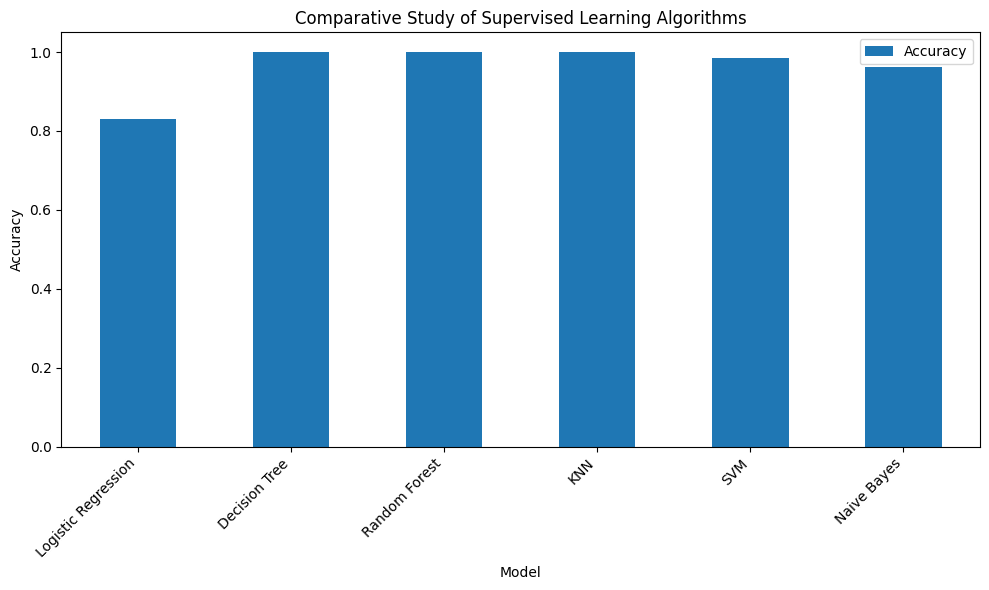

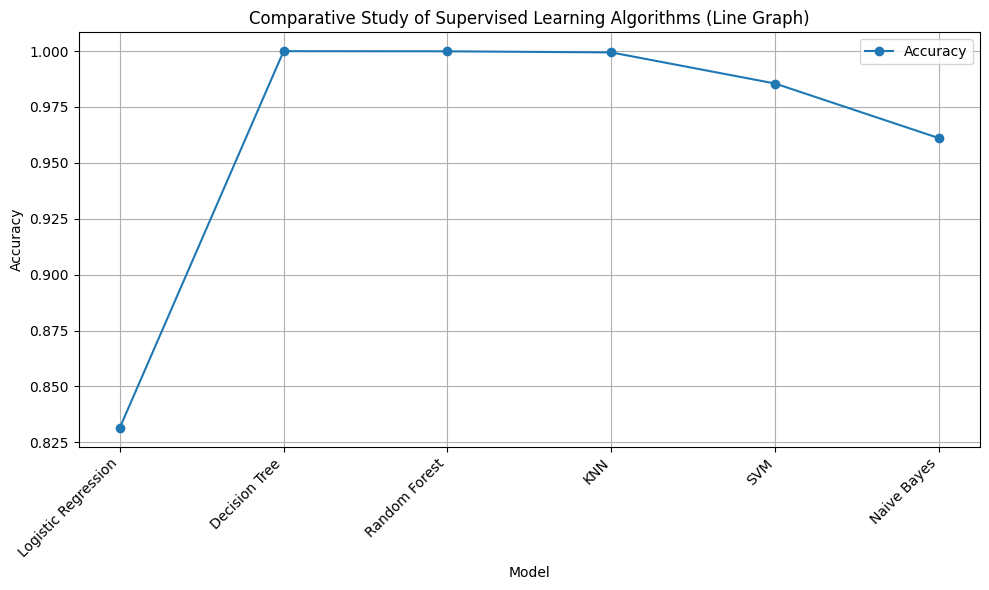

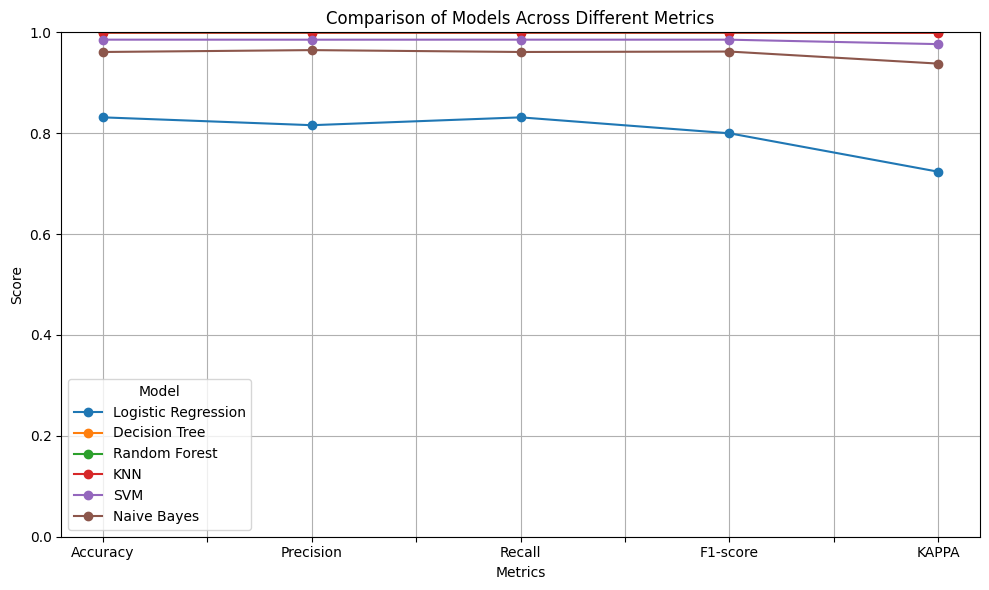

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each model as described in previous responses
# ... (your existing code to calculate metrics) ...

# Create a dictionary to store the metrics for each model
model_metrics = {
    "Logistic Regression": [log_reg_accuracy, log_reg_precision , log_reg_recall , log_reg_f1 ,log_reg_kappa],
    "Decision Tree": [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_kappa],
    "Random Forest": [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_kappa],
    "KNN": [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_kappa],
    "SVM": [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_kappa],
    "Naive Bayes": [nb_accuracy, nb_precision, nb_recall, nb_f1, nb_kappa],
}

# Create a Pandas DataFrame from the dictionary
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-score', "KAPPA"])

# Display the DataFrame as a table
print(metrics_df)

# Create a bar plot to visualize the accuracy of each model
metrics_df.plot(y='Accuracy', kind='bar', figsize=(10, 6))
plt.title('Comparative Study of Supervised Learning Algorithms')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a line graph to visualize the accuracy of each model
metrics_df.plot(y='Accuracy', kind='line', figsize=(10, 6), marker='o')
plt.title('Comparative Study of Supervised Learning Algorithms (Line Graph)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()

# Create a multi-line graph where each line represents a model and each metric is plotted on the x-axis
metrics_df.T.plot(figsize=(10, 6), marker='o')  # Transpose the DataFrame so that metrics are on the x-axis
plt.title('Comparison of Models Across Different Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title="Model")  # Add legend to indicate which line corresponds to which model
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 as scores are typically between this range
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()


Epoch 1/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8471 - loss: 0.6066
Epoch 2/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9674 - loss: 0.0812
Epoch 3/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9741 - loss: 0.0634
Epoch 4/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9755 - loss: 0.0588
Epoch 5/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9790 - loss: 0.0497
Epoch 6/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9793 - loss: 0.0492
Epoch 7/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9806 - loss: 0.0470
Epoch 8/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9818 - loss: 0.0431
Epoch 9/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9821 - loss: 0.0449
Epoch 10/10
9124/9124 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9833 - loss: 0.0409
4494/4494 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9790 - loss: 0.0434
Accuracy: 0.9795194268226624


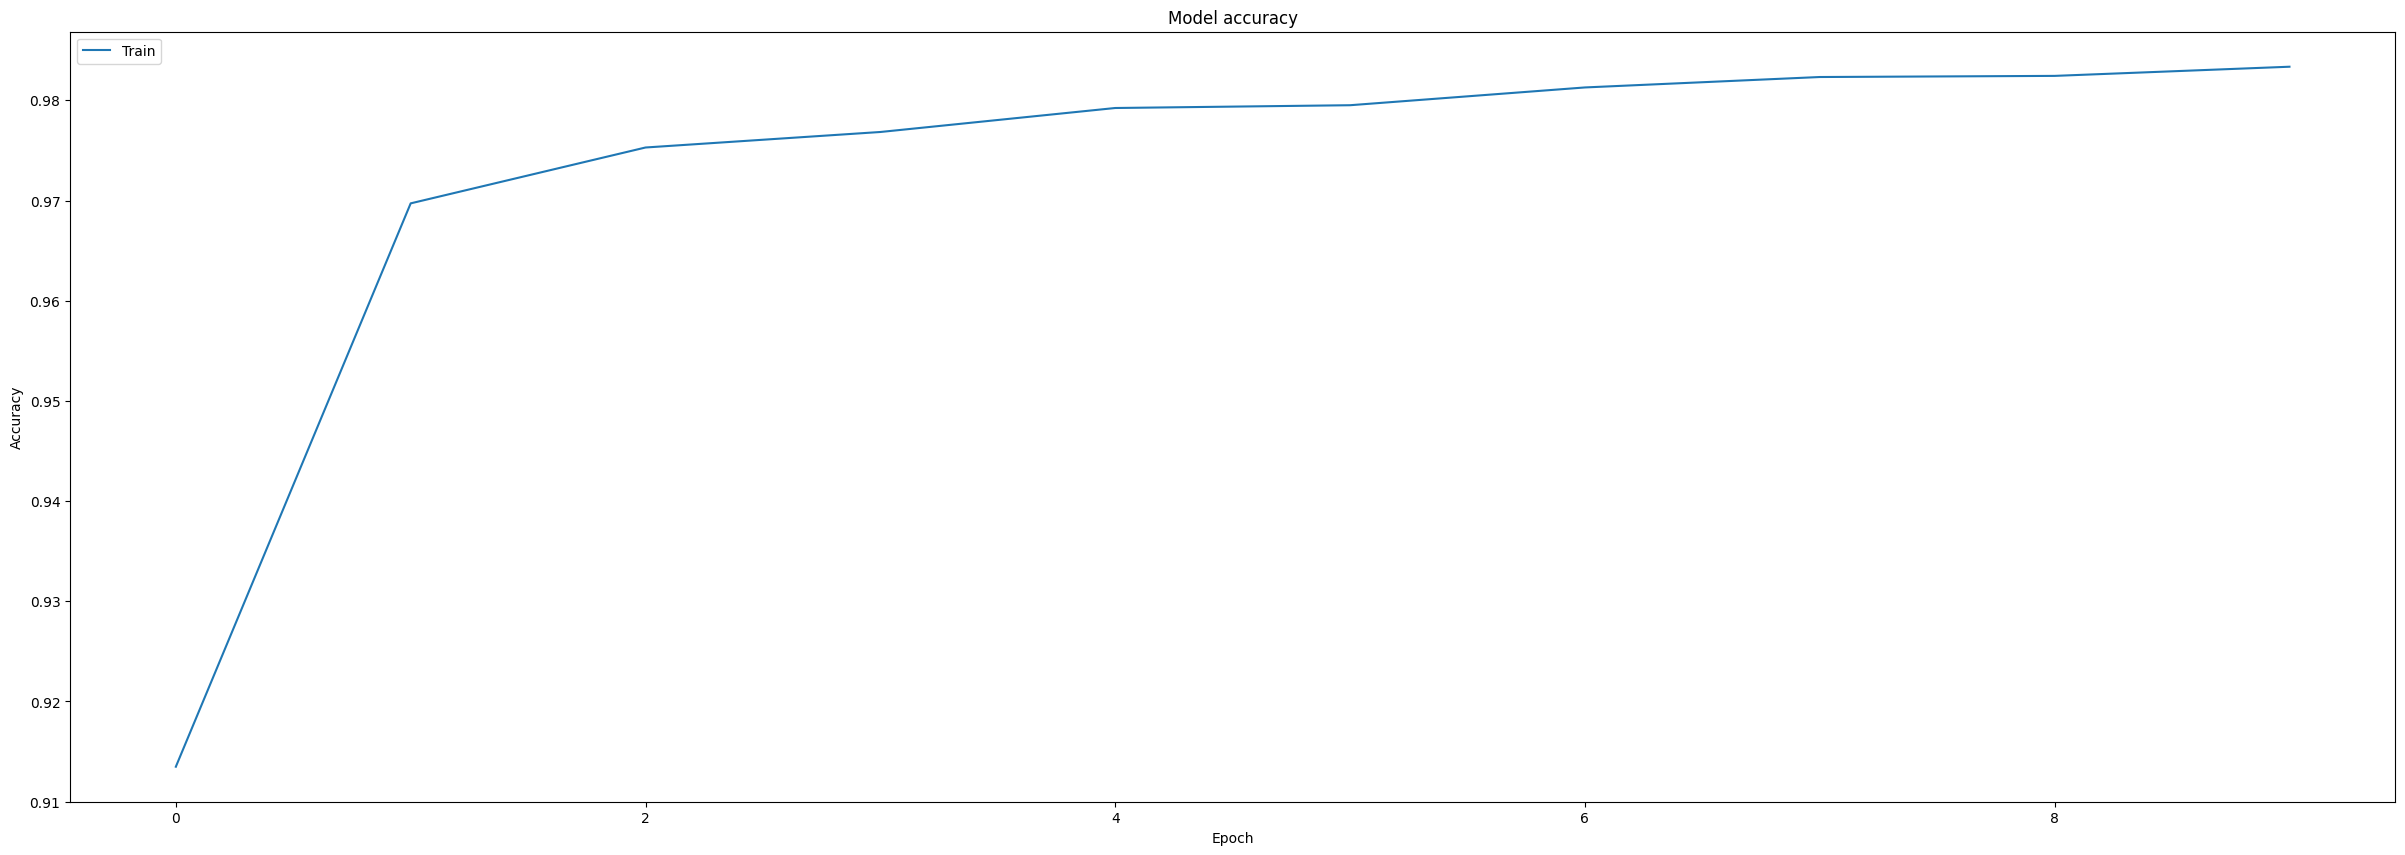

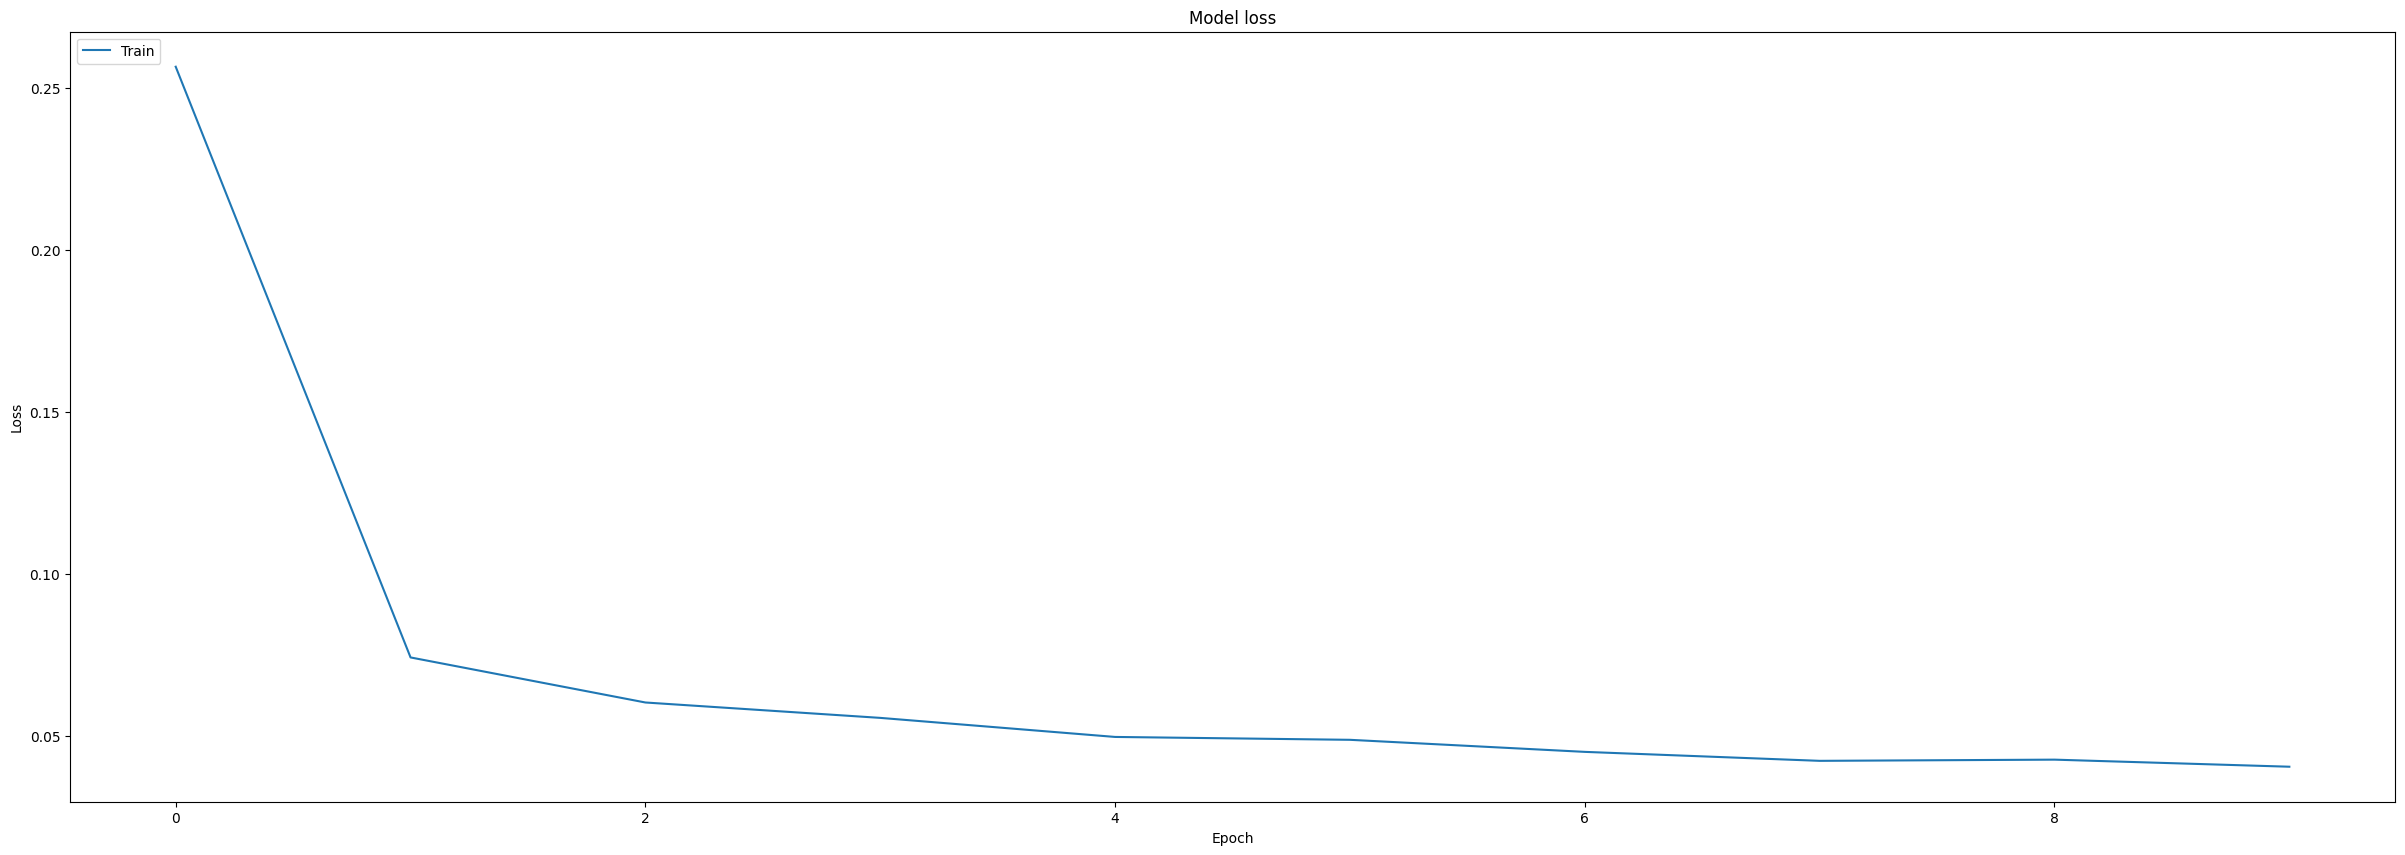

In [106]:
#deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train2.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(Y_train2)), activation='softmax')) # Output layer with number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to numerical values if they are not already
label_encoder = LabelEncoder()
Y_train2_encoded = label_encoder.fit_transform(Y_train2)
Y_test2_encoded = label_encoder.transform(Y_test2)
# Train the model and store the training history
history = model.fit(X_train2, Y_train2_encoded, epochs=10, batch_size=32)  

# Evaluate the model
_, accuracy = model.evaluate(X_test2, Y_test2_encoded)
print('Accuracy: {}'.format(accuracy))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy']) # If you have validation data
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') # Adjust legend if needed
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss']) # If you have validation data
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') # Adjust legend if needed
plt.show()



In [107]:
# !pip install --upgrade scikit-learn
# import sklearn
# print(sklearn.__version__)

In [108]:
# #genetic alogorithm
# import numpy as np
# import random
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Assuming df is already defined with the relevant data
# X = df[['SOi', 'Rpi', 'SPMi']]
# y = df['AQI_Range']

# # Encode categorical target variable if not already encoded
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=70)

# # Normalize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 2: Initialize Population
# def initialize_population(pop_size, n_features):
#     return np.random.uniform(low=-10, high=10, size=(pop_size, n_features))

# # Sigmoid function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# # Step 3: Fitness Function
# def fitness_function(individual, X, y):
#     raw_predictions = np.dot(X, individual)
#     probabilities = sigmoid(raw_predictions)
#     predictions = (probabilities > 0.5).astype(int)

#     accuracy = accuracy_score(y, predictions)
#     return accuracy

# # Step 4: Selection (Tournament Selection)
# def selection(population, fitnesses):
#     selected = np.random.choice(np.arange(len(population)), size=2, replace=False)
#     return population[selected[np.argmax(fitnesses[selected])]]

# # Step 5: Crossover (Single-point)
# def crossover(parent1, parent2):
#     crossover_point = np.random.randint(1, len(parent1))
#     child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
#     child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
#     return child1, child2

# # Step 6: Mutation
# def mutate(individual, mutation_rate=0.01):
#     for i in range(len(individual)):
#         if np.random.rand() < mutation_rate:
#             individual[i] += np.random.uniform(-1, 1)
#     return individual

# # Step 7: Genetic Algorithm with Elite Selection
# def genetic_algorithm(X_train, y_train, n_generations=10, pop_size=50, mutation_rate=0.05):
#     n_features = X_train.shape[1]
#     population = initialize_population(pop_size, n_features)
#     elite_fraction = 0.1  # Keep top 10% of the population as elite

#     for generation in range(n_generations):
#         fitnesses = np.array([fitness_function(ind, X_train, y_train) for ind in population])
#         best_fitness = np.max(fitnesses)
#         print(f"Generation {generation+1}: Best Fitness = {best_fitness}")

#         # Sort population by fitness
#         sorted_indices = np.argsort(fitnesses)[::-1]  # Indices of sorted fitness values, descending
#         sorted_population = population[sorted_indices]

#         num_elites = int(elite_fraction * pop_size)
#         new_population = list(sorted_population[:num_elites])  # Keep the elites

#         # Fill the rest of the population
#         while len(new_population) < pop_size:
#             parent1 = selection(population, fitnesses)
#             parent2 = selection(population, fitnesses)
#             child1, child2 = crossover(parent1, parent2)
#             child1 = mutate(child1, mutation_rate)
#             child2 = mutate(child2, mutation_rate)
#             new_population.extend([child1, child2])

#         population = np.array(new_population[:pop_size])

#     best_individual = population[np.argmax(fitnesses)]
#     return best_individual

# # Step 8: Train using Genetic Algorithm
# def train_with_genetic_algorithm(X_train, y_train):

#   best_individual = genetic_algorithm(X_train, y_train)

#   # Step 9: Test on Test Data
#   raw_test_predictions = np.dot(X_test, best_individual)
#   test_probabilities = sigmoid(raw_test_predictions)
#   test_predictions = (test_probabilities > 0.5).astype(int)
#   test_accuracy = accuracy_score(y_test, test_predictions)
#   return test_accuracy

# # Train and evaluate the model
# test_accuracy = train_with_genetic_algorithm(X_train, y_train)
# print(f"Test Accuracy: {test_accuracy}")



Generation 1: Best Fitness (RMSE) = 1.7089146827011479
Generation 2: Best Fitness (RMSE) = 1.7089146827011479
Generation 3: Best Fitness (RMSE) = 1.7089146827011479
Generation 4: Best Fitness (RMSE) = 1.7002982795860866
Generation 5: Best Fitness (RMSE) = 1.6979694836715773
Generation 6: Best Fitness (RMSE) = 1.692977932005024
Generation 7: Best Fitness (RMSE) = 1.6908633891147742
Generation 8: Best Fitness (RMSE) = 1.6908633891147742
Generation 9: Best Fitness (RMSE) = 1.6855653279307194
Generation 10: Best Fitness (RMSE) = 1.6849975170338398
Generation 11: Best Fitness (RMSE) = 1.6849723586683405
Generation 12: Best Fitness (RMSE) = 1.6846122583204213
Generation 13: Best Fitness (RMSE) = 1.6846122583204213
Generation 14: Best Fitness (RMSE) = 1.6846122583204213
Generation 15: Best Fitness (RMSE) = 1.6846122583204213
Generation 16: Best Fitness (RMSE) = 1.6846122583204213
Generation 17: Best Fitness (RMSE) = 1.684607116175056
Generation 18: Best Fitness (RMSE) = 1.684607116175056
Gene

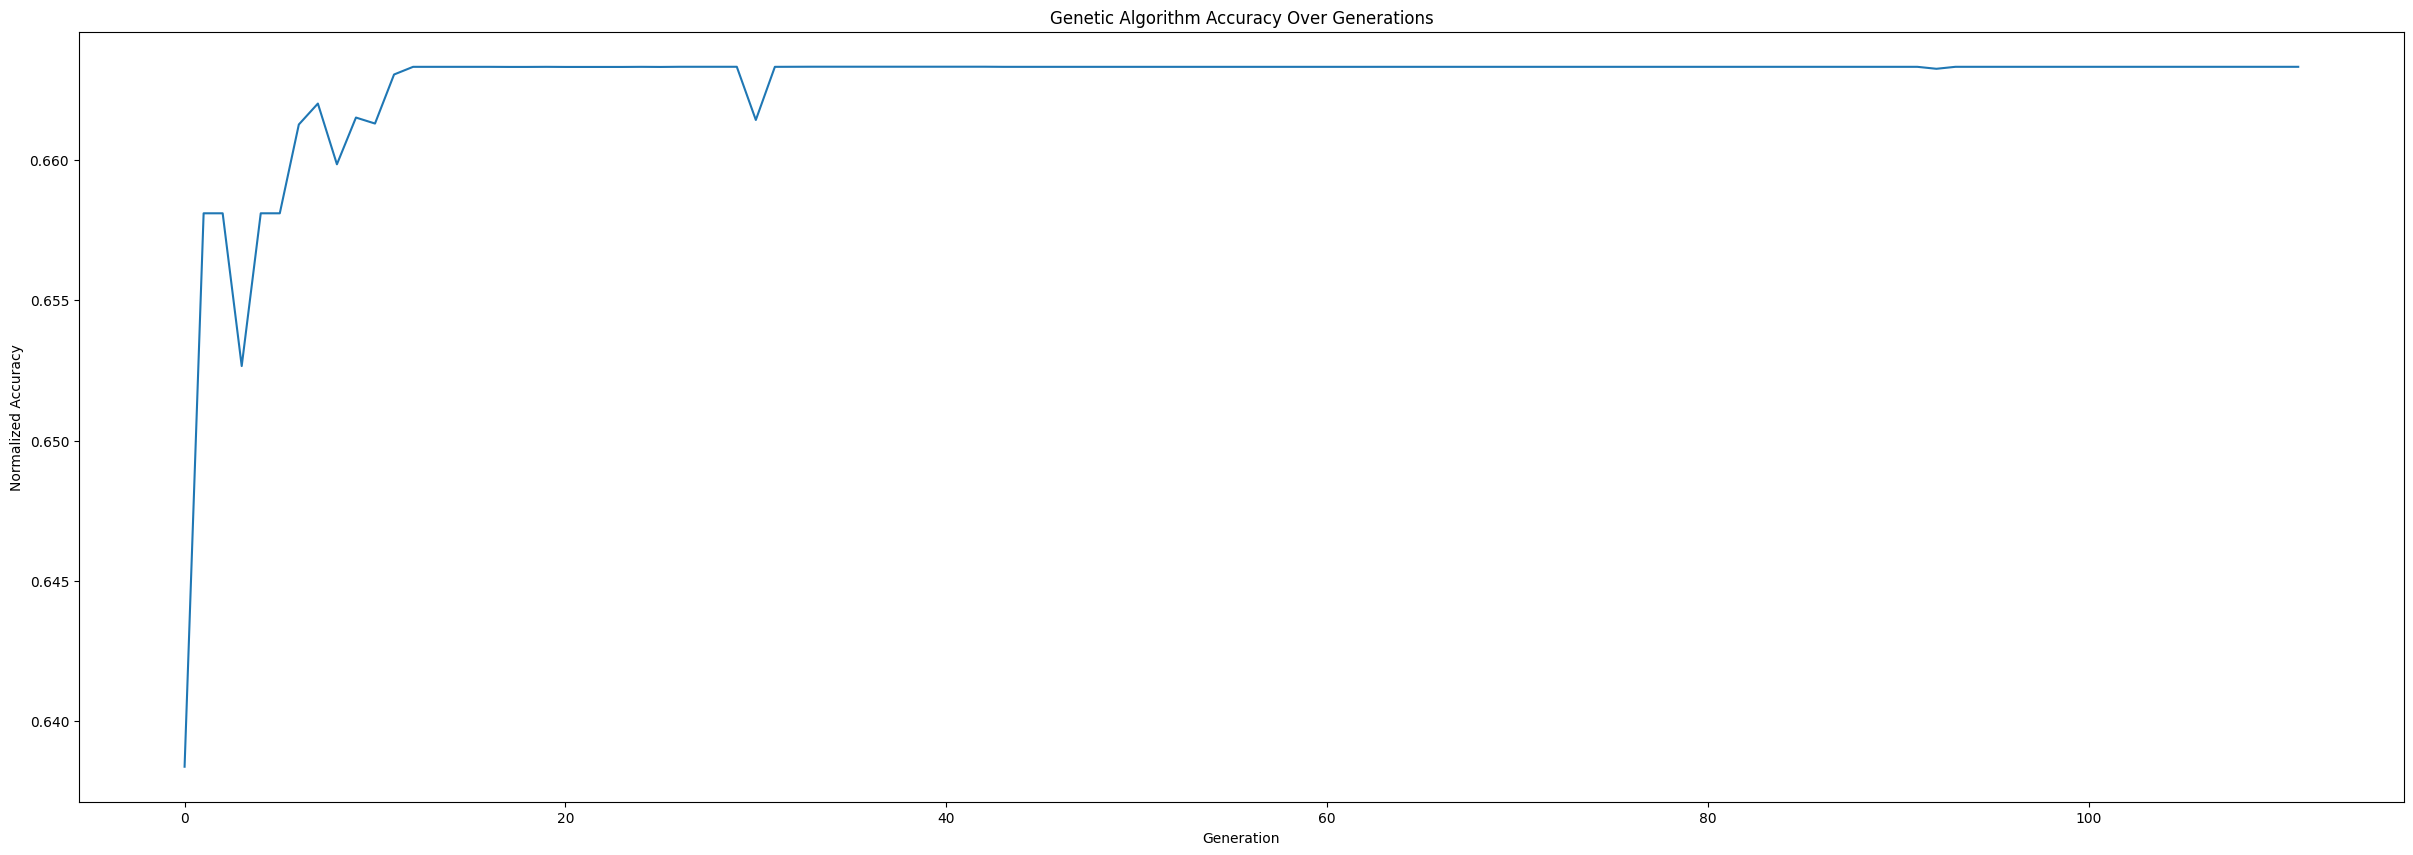

Generation 1: Best Fitness (RMSE) = 1.7364942376541184
Generation 2: Best Fitness (RMSE) = 1.7364942376541184
Generation 3: Best Fitness (RMSE) = 1.712197291654664
Generation 4: Best Fitness (RMSE) = 1.7004507801334239
Generation 5: Best Fitness (RMSE) = 1.7004507801334239
Generation 6: Best Fitness (RMSE) = 1.6866065377588455
Generation 7: Best Fitness (RMSE) = 1.6858248063431847
Generation 8: Best Fitness (RMSE) = 1.683292830806799
Generation 9: Best Fitness (RMSE) = 1.6832493633021253
Generation 10: Best Fitness (RMSE) = 1.6832493633021253
Generation 1: Best Fitness (RMSE) = 1.7110536938435148
Generation 2: Best Fitness (RMSE) = 1.7110536938435148
Generation 3: Best Fitness (RMSE) = 1.7110536938435148
Generation 4: Best Fitness (RMSE) = 1.6942653091693545
Generation 5: Best Fitness (RMSE) = 1.6940457042423884
Generation 6: Best Fitness (RMSE) = 1.6940457042423884
Generation 7: Best Fitness (RMSE) = 1.68517992783159
Generation 8: Best Fitness (RMSE) = 1.6844704692201307
Generation 9:

In [109]:
#genetic algorithm
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt

# Assuming df is already defined with the relevant data
X = df[['SOi', 'Rpi', 'SPMi']]
y = df['AQI_Range']

# Encode categorical target variable if not already encoded
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=70)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Initialize Population
def initialize_population(pop_size, n_features):
    return np.random.uniform(low=-1, high=1, size=(pop_size, n_features))

# Step 3: Fitness Function (RMSE)
def fitness_function(individual, X, y):
    raw_predictions = np.dot(X, individual)
    predictions = raw_predictions
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return -rmse  # Minimize RMSE

# Step 4: Selection (Tournament Selection)
def selection(population, fitnesses):
    selected = np.random.choice(np.arange(len(population)), size=2, replace=False)
    return population[selected[np.argmax(fitnesses[selected])]]

# Step 5: Crossover (Multi-point)
def multi_point_crossover(parent1, parent2, num_crossover_points=2):
    crossover_points = sorted(random.sample(range(1, len(parent1)), num_crossover_points))
    child = np.array(parent1)
    for i in range(len(crossover_points) - 1):
        start = crossover_points[i]
        end = crossover_points[i + 1]
        child[start:end] = parent2[start:end]
    return child

# Step 6: Mutation
def mutate(individual, mutation_rate=0.05):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.normal(0, 0.1)
    return individual

# Step 7: Genetic Algorithm with Elite Selection
def genetic_algorithm(X_train, y_train, n_generations=200, pop_size=100, mutation_rate=0.1, elite_fraction=0.2, early_stopping_patience=20):
    n_features = X_train.shape[1]
    population = initialize_population(pop_size, n_features)

    generation_accuracies = []
    best_fitness = -np.inf
    no_improvement_count = 0

    for generation in range(n_generations):
        fitnesses = np.array([fitness_function(ind, X_train, y_train) for ind in population])
        current_best_fitness = np.max(fitnesses)

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            no_improvement_count = 0
        else:
            no_improvement_count += 1
            if no_improvement_count >= early_stopping_patience:
                print(f"Early Stopping at Generation {generation + 1}")
                break

        print(f"Generation {generation+1}: Best Fitness (RMSE) = {-best_fitness}")

        # Sort population by fitness
        sorted_indices = np.argsort(fitnesses)[::-1]
        sorted_population = population[sorted_indices]

        num_elites = int(elite_fraction * pop_size)
        new_population = list(sorted_population[:num_elites])  # Keep elites (convert to list)

        while len(new_population) < pop_size:
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            child = multi_point_crossover(parent1, parent2, num_crossover_points=2)  # Use multi-point crossover
            child = mutate(child, mutation_rate)
            new_population.append(child)  # Append to the list

        population = np.array(new_population)  # Convert back to array

        # Evaluate accuracy
        best_individual = population[np.argmax(fitnesses)]
        test_predictions = np.dot(X_test, best_individual)
        rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        normalized_accuracy = 1 - (rmse / np.max(y_test))
        generation_accuracies.append(normalized_accuracy)

    return best_individual, generation_accuracies

# Step 8: Train using Genetic Algorithm
def train_with_genetic_algorithm(X_train, y_train):
    global best_individual  # Declare 'best_individual' as a global variable
    best_individual, generation_accuracies = genetic_algorithm(X_train, y_train)

    # Test on Test Data
    raw_test_predictions = np.dot(X_test, best_individual)
    test_predictions = raw_test_predictions

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mae = mean_absolute_error(y_test, test_predictions)
    normalized_final_accuracy = 1 - (rmse / np.max(y_test))
    return rmse, mae, generation_accuracies, normalized_final_accuracy

# Train and evaluate the model
rmse, mae, generation_accuracies, normalized_final_accuracy = train_with_genetic_algorithm(X_train, y_train)
print(f"Final Test RMSE: {rmse}")
print(f"Final Test MAE: {mae}")
print(f"Final Normalized Accuracy: {normalized_final_accuracy}")

# Plot the generation accuracies
plt.plot(generation_accuracies)
plt.xlabel("Generation")
plt.ylabel("Normalized Accuracy")
plt.title("Genetic Algorithm Accuracy Over Generations")
plt.show()

# Create a class to wrap your GA and provide fit/predict methods
class GARegressor:
    def __init__(self, n_generations=10, pop_size=50, mutation_rate=0.5, elite_fraction=0.2, early_stopping_patience=20):
        self.n_generations = n_generations
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.elite_fraction = elite_fraction
        self.early_stopping_patience = early_stopping_patience
        self.best_individual = None

    def fit(self, X_train, y_train):
        self.best_individual, _ = genetic_algorithm(
            X_train, y_train,
            n_generations=self.n_generations,
            pop_size=self.pop_size,
            mutation_rate=self.mutation_rate,
            elite_fraction=self.elite_fraction,
            early_stopping_patience=self.early_stopping_patience
        )
        return self

    def predict(self, X_test):
        return np.dot(X_test, self.best_individual)

    # Add the get_params method
    def get_params(self, deep=True):
        """Get parameters for this estimator.

        Parameters
        ----------
        deep : bool, default=True
            If True, will return the parameters for this estimator and
            contained subobjects that are estimators.

        Returns
        -------
        params : dict
            Parameter names mapped to their values.
        """
        params = {
            'n_generations': self.n_generations,
            'pop_size': self.pop_size,
            'mutation_rate': self.mutation_rate,
            'elite_fraction': self.elite_fraction,
            'early_stopping_patience': self.early_stopping_patience,
        }
        return params

    def set_params(self, **params):
        """Set the parameters of this estimator.

        The method works on simple estimators as well as on nested objects
        (such as pipelines). The latter have parameters of the form
        ``<component>__<parameter>`` so that it's possible to update each
        component of a nested object.

        Parameters
        ----------
        **params : dict
            Estimator parameters.

        Returns
        -------
        self : estimator instance
            Estimator instance.
        """
        if not params:
            return self
        valid_params = self.get_params(deep=True)
        for key, value in params.items():
            if key not in valid_params:
                raise ValueError(
                    'Invalid parameter %s for estimator %s. '
                    'Check the list of available parameters with '
                    '`estimator.get_params().keys()`.',
                    key, self)
            setattr(self, key, value)
        return self


# Bagging with GA
bagging_model = BaggingRegressor(
    estimator=GARegressor(),  # Pass the GARegressor class
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Evaluate Bagging Model
bagging_predictions = bagging_model.predict(X_test)
bagging_rmse = np.sqrt(mean_squared_error(y_test, bagging_predictions))
print(f"Bagging Test RMSE: {bagging_rmse}")

# Calculate and print Bagging Test Accuracy
bagging_accuracy = 1 - (bagging_rmse / np.max(y_test))  # Normalize
print(f"Bagging Test Accuracy: {bagging_accuracy}")

# Calculate and print GA Test Accuracy
ga_predictions = np.dot(X_test, best_individual)  # Use the 'best_individual' from GA training
ga_rmse = np.sqrt(mean_squared_error(y_test, ga_predictions))
ga_accuracy = 1 - (ga_rmse / np.max(y_test))
print(f"GA Test Accuracy: {ga_accuracy}")

In [110]:
%pip install distributed


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: distributed in c:\users\haman\desktop\project\final year project\archive\finalprojectenv\lib\site-packages (2024.8.0)



You should consider upgrading via the 'c:\Users\haman\Desktop\project\final year project\archive\finalprojectenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [111]:
%pip install scikit-elm
#Extreme Learning Machine(ELM)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skelm import ELMRegressor
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with features and target variable
X = df[['SOi','Rpi','SPMi']]
y = df['AQI_Range']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize ELM model
elm = ELMRegressor()

# Train the model
elm.fit(X_train, y_train_encoded)

# Predict on training data
train_predictions = elm.predict(X_train)
train_predictions = np.round(train_predictions).astype(int)  # Round to nearest integer for classification
train_accuracy = accuracy_score(y_train_encoded, train_predictions)
print("Training Accuracy:", train_accuracy)

# Predict on testing data
test_predictions = elm.predict(X_test)
test_predictions = np.round(test_predictions).astype(int)  # Round to nearest integer for classification
test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Testing Accuracy:", test_accuracy)

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\haman\Desktop\project\final year project\archive\finalprojectenv\Scripts\python.exe -m pip install --upgrade pip' command.


Training Accuracy: 0.8177580177223949
Testing Accuracy: 0.8193817587537814


In [112]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=70)
models = {"Logistic Regression": LogisticRegression(),
          "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5, min_samples_leaf=10),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='log2'),
          "Support Vector Machine": SVC(kernel='linear'),
          "Naive Bayes": GaussianNB(),
          "Deep Learning": Sequential(),
          "Extreme learning Machine": ELMRegressor(),
          "Genetic Algorithm": GARegressor()
         }

In [113]:
from sklearn.preprocessing import LabelEncoder

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set the random seed
    np.random.seed(42)
    # Dictionary to keep model scores
    model_scores = {}
    
    # Encode y_train and y_test to numeric if they are categorical
    if y_train.dtype == 'object':  # Check if y_train is categorical (object type)
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        y_test = label_encoder.transform(y_test)
    
    # Loop through models
    for name, model in models.items():
        if name == "Deep Learning":
            # Add layers and compile the Deep Learning model
            model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(len(np.unique(y_train)), activation='softmax'))
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=10, batch_size=32)
            # Evaluate the model
            _, accuracy = model.evaluate(X_test, y_test)
            model_scores[name] = accuracy
            
        elif name == "Genetic Algorithm":  # Handle Genetic Algorithm model
            # Assuming df is already defined with the relevant data
            X = df[['SOi', 'Rpi', 'SPMi']]
            y = df['AQI_Range']
            
            # Encode categorical target variable if not already encoded
            label_encoder = LabelEncoder()
            y_encoded = label_encoder.fit_transform(y)
            
            # Split the dataset
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=70)
            
            # Normalize features
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            ga_predictions = np.dot(X_test, best_individual)
            ga_rmse = np.sqrt(mean_squared_error(y_test, ga_predictions))
            ga_accuracy = 1 - (ga_rmse / np.max(y_test))
            print(f"GA Test Accuracy: {ga_accuracy}")
            print('-' * 50)
            model_scores[name] = ga_accuracy
            print('-' * 50)

        elif name == "Extreme learning Machine":
            elm = ELMRegressor()
            # Train the model
            elm.fit(X_train, y_train)
            # Predict on testing data
            test_predictions = elm.predict(X_test)
            test_predictions = np.round(test_predictions).astype(int)  # Round to nearest integer for classification
            test_accuracy = accuracy_score(y_test, test_predictions)
            model_scores[name] = test_accuracy
            print(f"Testing Accuracy of {name} model:", test_accuracy)
        
        else:
            X2 = df[['SOi','Rpi','SPMi']]
            Y2 = df['AQI_Range']
            # Splitting the data into independent and dependent columns for classification
  
            X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
            # Fit the model
            model.fit(X_train, y_train)
            # Predict on train
            train_model = model.predict(X_train)
            print(f"{name} accuracy on train is: ", accuracy_score(y_train, train_model))
            # Predict on test
            test_model = model.predict(X_test)
            accuracy = accuracy_score(y_test, test_model)
            print(f"{name} accuracy on test is: ", accuracy)
            print('-' * 50)
            model_scores[name] = accuracy
            
    return model_scores


In [114]:
model_scores = fit_and_score(models=models, X_train=X_train2, X_test=X_test2, y_train=Y_train2, y_test=Y_test2)
model_scores

Logistic Regression accuracy on train is:  0.830332217834059
Logistic Regression accuracy on test is:  0.8314336381654439
--------------------------------------------------
DecisionTreeClassifier accuracy on train is:  0.9999794483245247
DecisionTreeClassifier accuracy on test is:  0.999951319586912
--------------------------------------------------
KNN accuracy on train is:  0.999684874309378
KNN accuracy on test is:  0.9993949720087625
--------------------------------------------------
Random Forest accuracy on train is:  0.993899577663069
Random Forest accuracy on test is:  0.9939149483639904
--------------------------------------------------
Support Vector Machine accuracy on train is:  0.9851925178200153
Support Vector Machine accuracy on test is:  0.9854723738655725
--------------------------------------------------
Naive Bayes accuracy on train is:  0.9610888277666837
Naive Bayes accuracy on test is:  0.9610417608400849
--------------------------------------------------
Epoch 1/

{'Logistic Regression': 0.8314336381654439,
 'DecisionTreeClassifier': 0.999951319586912,
 'KNN': 0.9993949720087625,
 'Random Forest': 0.9939149483639904,
 'Support Vector Machine': 0.9854723738655725,
 'Naive Bayes': 0.9610417608400849,
 'Deep Learning': 0.9824680685997009,
 'Extreme learning Machine': 0.8254807190792448,
 'Genetic Algorithm': 0.6633117778623707}

In [115]:
model_scores

{'Logistic Regression': 0.8314336381654439,
 'DecisionTreeClassifier': 0.999951319586912,
 'KNN': 0.9993949720087625,
 'Random Forest': 0.9939149483639904,
 'Support Vector Machine': 0.9854723738655725,
 'Naive Bayes': 0.9610417608400849,
 'Deep Learning': 0.9824680685997009,
 'Extreme learning Machine': 0.8254807190792448,
 'Genetic Algorithm': 0.6633117778623707}

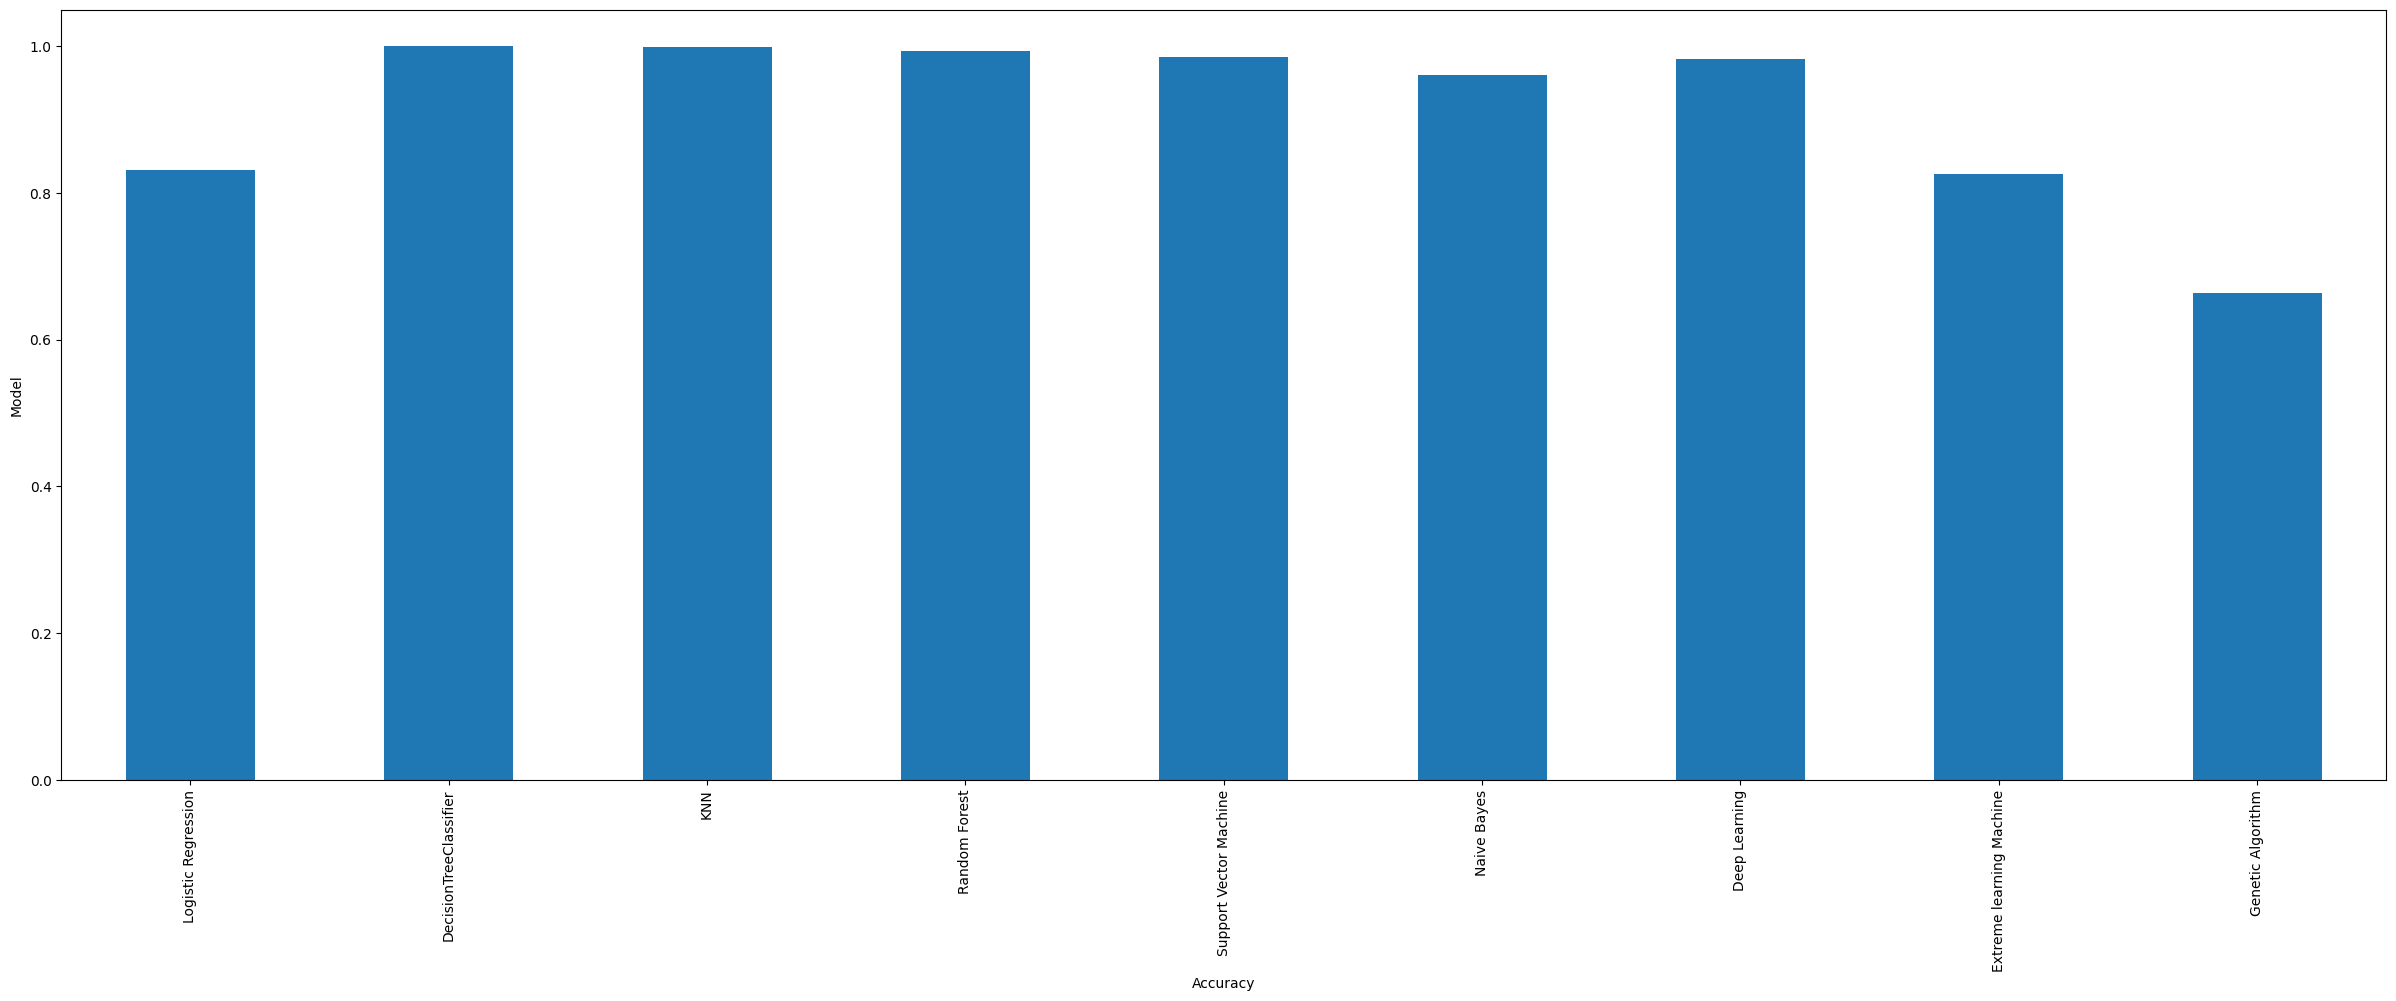

In [116]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(legend=False)
#write x lable and y label
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

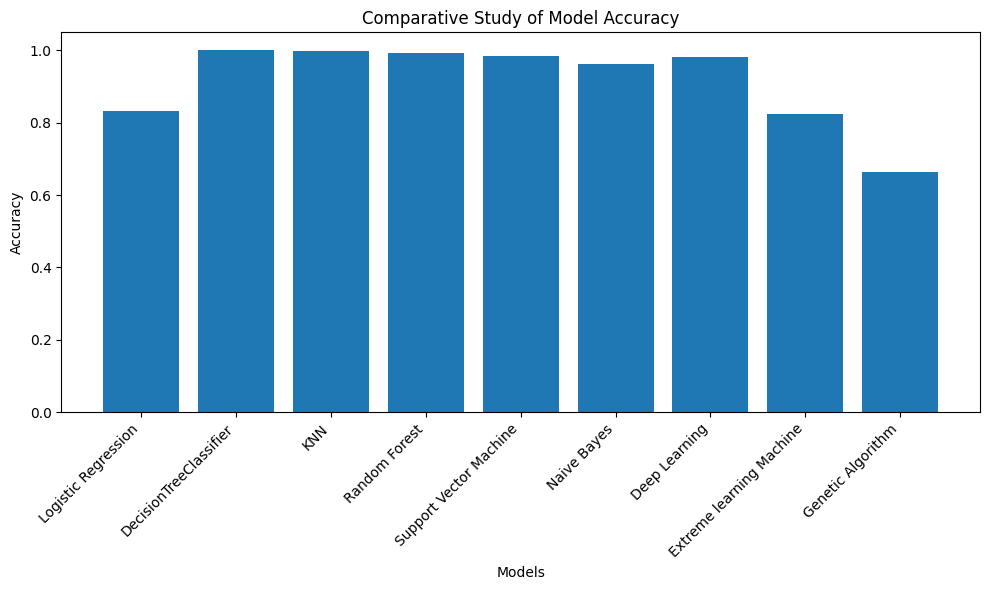

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a Pandas DataFrame
scores_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
scores_df = scores_df.rename_axis('Models')

# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(scores_df.index, scores_df['Accuracy'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparative Study of Model Accuracy")
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()  # Optional: Adjust layout to prevent labels from overlapping
plt.show()

In [118]:
import pandas as pd

# Create a Pandas DataFrame from the dictionary
scores_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
# Rename the index column to 'Models'
scores_df = scores_df.rename_axis('Models')
# Display the DataFrame as a table
print(scores_df)

                          Accuracy
Models                            
Logistic Regression       0.831434
DecisionTreeClassifier    0.999951
KNN                       0.999395
Random Forest             0.993915
Support Vector Machine    0.985472
Naive Bayes               0.961042
Deep Learning             0.982468
Extreme learning Machine  0.825481
Genetic Algorithm         0.663312
